In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print('Versions des librairies ',
      'pandas : ',pd.__version__,
      ' , numpy : ',np.__version__,
      ' , seaborn : ',sns.__version__,)

Versions des librairies  pandas :  1.5.2  , numpy :  1.23.5  , seaborn :  0.12.2


In [3]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [4]:
data.shape

(3376, 46)

In [5]:
pd.set_option('display.max_column',50)

In [6]:
data.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

# Analyse exploratoire

## Objectifs :
- Comprendre au mieux les données
- Développer une première stratégie de modélisation

## <a href="#1">  1) Analyse de la forme
- **variables target** : SiteEnergyUse(kBtu) et TotalGHGEmissions
- **lignes et colonnes** : 3376, 46
- **types de variables** : qualitatives : 15, quantitatives : 30, booléenne : 1
- **analyse des valeurs manquantes** : très peu de nan, 1 colonne vide(comments) à supprimer
- **doublons** : aucun

## <a href="#2"> 2) Analyse de fond
- <a href="#2a"> **visualisation des targets** :
    
    - <a href="#2a1"> SiteEnergyUse(kBtu) : 
    
        - les valeurs de Energy varient entre 0 et 8,7e+8. Moyenne : 5,4e+6. Médiane: 1.8e+06. Ecart_type : 2.2e+7.
        - 5 valeurs manquantes -> lignes à supprimer
        - présence de quelques outliers -> regarder si ceux sont des valeurs aberrantes
    - <a href="#2a2"> TotalGHGEmissions :
    
        - Les valeurs de Emissions varient entre -0.8 et 16871. Moyenne : 120. Médiane : 34. Ecart_type : 539. -> supprimer les lignes où les valeurs sont négatives
        - 9 valeurs manquantes -> lignes à supprimer
        - présence de quelques outliers -> regarder si ceux sont des valeurs aberrantes
        
        
- <a href="#2b"> **signification des variables** :
    
    - <a href="#2b1"> Variables numériques :
    
        - OSEBuildingID : numéro d'identité du bâtiment (sans intérêt) -> à supprimer
        - DataYear : une seule valeur (2016), colonne inutile -> à supprimer
        - ZipCode, CouncilDistrictCode, Latitude, Longitude : informations géographiques. ZipCode a beaucoup de valeurs uniques(inintéressant), CouncilDistrictCode a 7 valeurs différentes et se comporte comme une variable ordinale, Latitude et Longitude n'ont pas d'intérêt ->  supprimer ces 3 variables 
        - YearBuilt : année de construction. Plus de 100 valeurs différentes -> à regrouper -> variable categorielle
        - NumberofBuildings, NumberofFloors : 1 valeur surprenante : 0 bâtiment -> remplacer 0 par 1 
        - PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA : superficies
        - ENERGYSTARScore : indicateur ENERGYSTAR, varie de 1 à 100
        - SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu),  SiteEnergyUseWN(kBtu) : consommations d'énergie selon la surface ou pas, les conditions météorologiques... SiteEnergyUse(kBtu) est une target, les autres variables sont inutiles -> à supprimer
        - SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu) : consommations des différentes sources d'énergie -> garder que les unités en kBtu. La somme des autres devrait donner SiteEnergyUse(kBtu) -> attention au data leakage 
        - GHGEmissionsIntensity : émissions ramenées à la superficie, colonne inutile -> à supprimer
    
    - <a href="#2b2"> Variable booléenne :
    
        - DefaultData : indique que 112 sites ont utilisé au moins une valeur par défaut.
    
    - <a href="#2b3"> Variables catégorielles :
    
        - BuildingType : type de bâtiment -> supprimer les résidentiels
        - PrimaryPropertyType : utilisation principale du site
        - PropertyName, Address, City, State, TaxParcelIdentificationNumber : nom de la propriété et adresse, inutiles -> à supprimer
        - Neighborhood : quartier. 19 valeurs différentes.
        - ListOfAllPropertyUseTypes, LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType : utilisations du site
        - YearsENERGYSTARCertified : année de certification du EnergyStar, inutile -> à supprimer
        - ComplianceStatus : état de conformité -> garder uniquement les sites conformes puis supprimer la variable
        - Outlier : indique si un site possède ou pas des valeurs aberrantes (élevées : 2 et basses : 15) -> supprimer les lignes qui ont un outlier élevé puis supprimer la variable Outlier
        
        
        
- <a href="#2c"> **relation target/variables** :
    
    - <a href="#2c1"> variable booléenne :
    
        - DefaultData n'a plus qu'une seule valeur, inutile -> à supprimer
    
    - <a href="#2c2"> variables numériques :
    
        - CouncilDistrictCode a des ditributions très proches selon ses valeurs
        - NumberofFloors semble fortement corrélé avec SiteEnergyUse(kBtu) mais moins avec TotalGHGEmissions
        - PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA : LargestPropertyUseTypeGFA semble corrélé avec SiteEnergyUse(kBtu). On a bien PropertyGFAParking + PropertyGFABuilding(s) = PropertyGFATotal. 
        - ENERGYSTARScore ne semble pas corrélé avec SiteEnergyUse(kBtu) et TotalGHGEmissions.
        - SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu) : lorsqu'on ajoute ces 3 valeurs, on obtient SiteEnergyUse(kBtu).
    
    - <a href="#2c3"> variables catégorielles :
    
        - BuildingType : selon le type de bâtiment, les moyennes et médianes de SiteEnergyUse(kBtu) et TotalGHGEmissions ont des grandes différences
        - Il en est de même avec PrimaryPropertyType et Neighborhood


## <a href="#3"> 3) Analyse plus détaillée
-**modification de la variable YearBuilt** :
    les années sont maintenant regroupées par tranche de 10 ans
    
-**relation variables/variables** :
    - certaines valeurs de LargestPropertyUseTypeGFA et de SecondLargestPropertyUseTypeGFA étaient incohérentes par rapport à PropertyGFATotal -> corrections
    - corrélations fortes intéressantes : SiteEnergyUse(kBtu) avec PropertyGFATotal (0.8), PropertyGFABuilding(s) (0.81) et LargestPropertyUseTypeGFA (0.84)
    - Les eta squared nous indiquent que ListOfAllPropertyUseTypes, PrimaryPropertyType, LargestPropertyUseType, SecondLargestPropertyUseType et ThirdLargestPropertyUseType ont une influence sur SiteEnergyUse(kBtu) et TotalGHGEmissions
    

## <a name="1"> 1) Analyse de la forme

In [7]:
df = data.copy()

In [8]:
df.shape

(3376, 46)

In [9]:
df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

<AxesSubplot: >

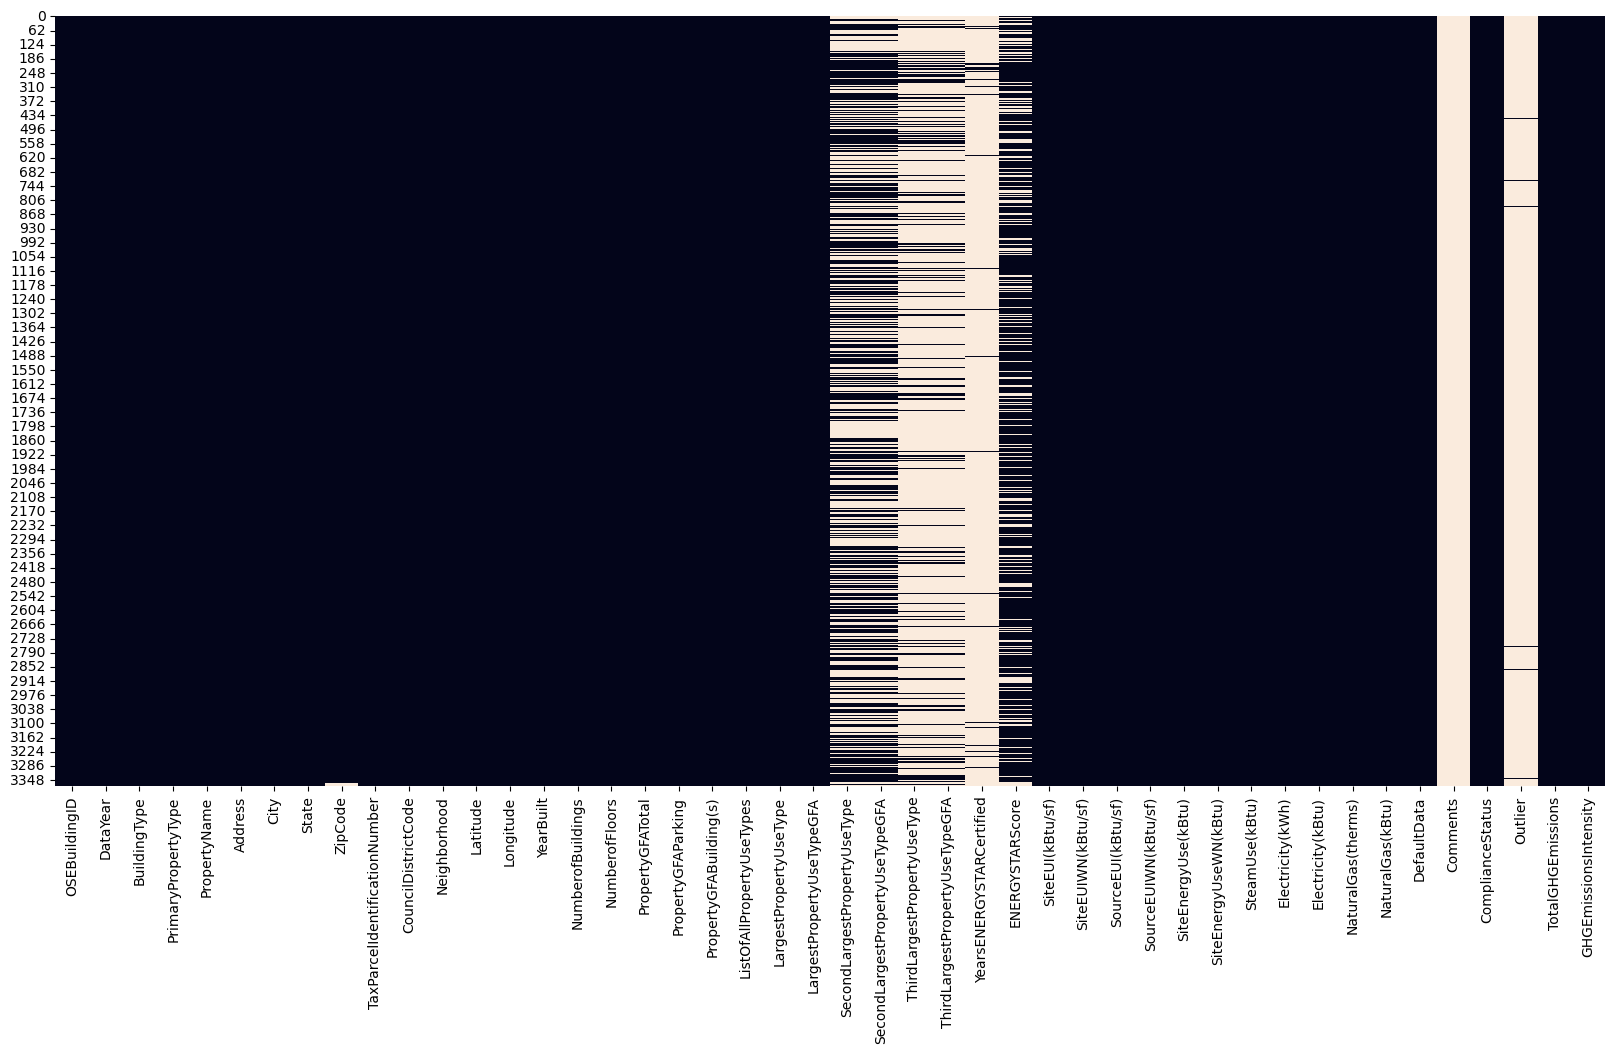

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [11]:
df.isna().mean().sort_values()

OSEBuildingID                      0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
PropertyGFATotal                   0.000000
NumberofFloors                     0.000000
YearBuilt                          0.000000
Longitude                          0.000000
Latitude                           0.000000
Neighborhood                       0.000000
DefaultData                        0.000000
CouncilDistrictCode                0.000000
ComplianceStatus                   0.000000
State                              0.000000
City                               0.000000
Address                            0.000000
PropertyName                       0.000000
PrimaryPropertyType                0.000000
BuildingType                       0.000000
DataYear                           0.000000
TaxParcelIdentificationNumber      0.000000
SiteEnergyUse(kBtu)                0.001481
SiteEnergyUseWN(kBtu)              0.001777
SiteEUIWN(kBtu/sf)              

In [12]:
# je supprime la variable comments qui est vide

df = df.drop('Comments',axis=1)

In [13]:
# vérifions les doublons 

df.duplicated('OSEBuildingID').sum()

0

## <a name="2"> 2) Analyse de fond

### <a name="2a"> Visualisation des variables target

#### <a name="2a1"> SiteEnergyUse(kBtu)

In [14]:
df['SiteEnergyUse(kBtu)'].describe()

count    3.371000e+03
mean     5.403667e+06
std      2.161063e+07
min      0.000000e+00
25%      9.251286e+05
50%      1.803753e+06
75%      4.222455e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

In [15]:
df['SiteEnergyUse(kBtu)'].isna().value_counts()

False    3371
True        5
Name: SiteEnergyUse(kBtu), dtype: int64

In [16]:
# je supprime les lignes où la valeur énergie est manquante

df = df[df['SiteEnergyUse(kBtu)'].isna()==False]

<AxesSubplot: >

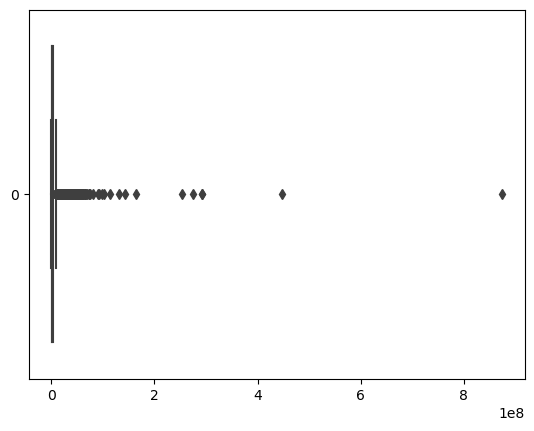

In [17]:
sns.boxplot(df['SiteEnergyUse(kBtu)'], orient='h')

In [18]:
# je supprime les lignes dont l'energie est supérieure à 2e+8

df = df.loc[df['SiteEnergyUse(kBtu)'] < 2e+08,: ]

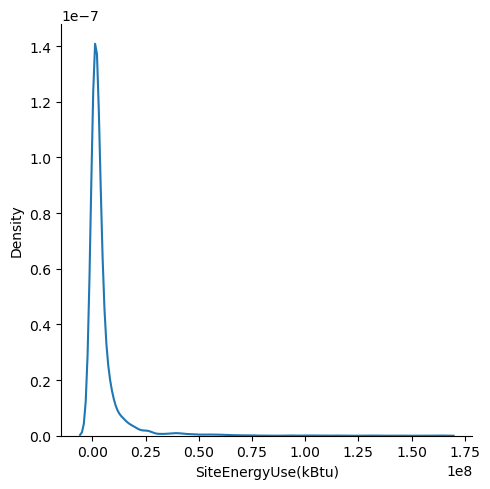

In [19]:
sns.displot(df['SiteEnergyUse(kBtu)'],kind='kde')

#### <a name="2a2"> TotalGHGEmissions

In [20]:
df['TotalGHGEmissions'].describe()

count    3361.000000
mean      101.752455
std       270.177728
min        -0.800000
25%         9.480000
50%        33.800000
75%        93.500000
max      6330.910000
Name: TotalGHGEmissions, dtype: float64

In [21]:
# je supprime les lignes où les émissions sont négatives

df = df[df['TotalGHGEmissions']>0]

In [22]:
df['TotalGHGEmissions'].isna().value_counts()

False    3351
Name: TotalGHGEmissions, dtype: int64

In [23]:
# je supprime les lignes où la valeur emissions est manquante

df=df[df['TotalGHGEmissions'].isna()==False]

<AxesSubplot: >

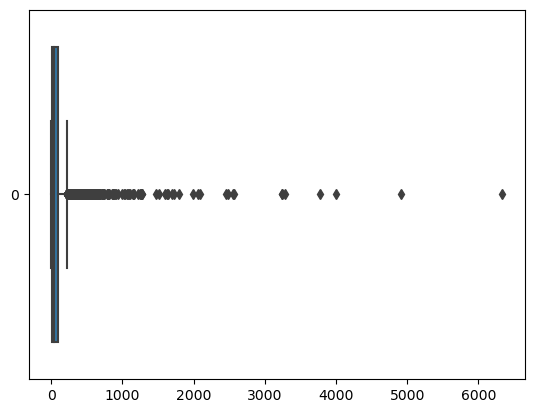

In [24]:
sns.boxplot(df['TotalGHGEmissions'],orient='h')

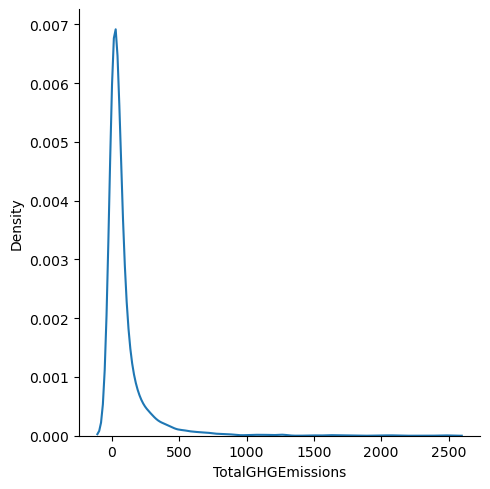

In [25]:
df_reduit = df.loc[df['TotalGHGEmissions'] < 2500,: ]
sns.displot(df_reduit['TotalGHGEmissions'],kind='kde')

### <a name="2b"> Signification des variables

#### <a name="2b1"> Variables numériques

In [26]:
# Affichage des variables numériques

df.select_dtypes(['float','int']).columns

Index(['OSEBuildingID', 'DataYear', 'ZipCode', 'CouncilDistrictCode',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [27]:
df['DataYear'].unique()

array([2016], dtype=int64)

In [28]:
df['CouncilDistrictCode'].unique()

array([7, 3, 2, 4, 5, 6, 1], dtype=int64)

In [29]:
df['ZipCode'].unique()

array([98101., 98121., 98104., 98154., 98118., 98105., 98125., 98109.,
       98070., 98199., 98115., 98107., 98144., 98103., 98119., 98136.,
       98122., 98126., 98133., 98146., 98033., 98106., 98112., 98108.,
       98111., 98134., 98117., 98116., 98191., 98164., 98195., 98185.,
       98181., 98102., 98168., 98155., 98006., 98124., 98053., 98012.,
       98013., 98028., 98178., 98114., 98127., 98165., 98011., 98198.,
       98113., 98040., 98204., 98177., 98020., 98272., 98145.,    nan])

In [30]:
df['ZipCode'].value_counts()

98109.0    294
98104.0    249
98122.0    241
98101.0    229
98105.0    187
98134.0    186
98121.0    184
98102.0    168
98119.0    165
98103.0    160
98125.0    150
98108.0    128
98115.0    127
98133.0    123
98107.0    101
98144.0     99
98116.0     92
98118.0     85
98199.0     70
98112.0     66
98126.0     64
98106.0     50
98117.0     31
98136.0     27
98195.0     10
98146.0      6
98178.0      4
98155.0      4
98111.0      3
98168.0      2
98177.0      2
98164.0      2
98013.0      2
98154.0      2
98124.0      2
98113.0      1
98011.0      1
98198.0      1
98020.0      1
98040.0      1
98204.0      1
98127.0      1
98272.0      1
98165.0      1
98006.0      1
98114.0      1
98028.0      1
98012.0      1
98053.0      1
98181.0      1
98185.0      1
98191.0      1
98070.0      1
98033.0      1
98145.0      1
Name: ZipCode, dtype: int64

In [31]:
len(df['YearBuilt'].unique())

113

In [32]:
sorted(df['NumberofBuildings'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 8.0,
 9.0,
 10.0,
 11.0,
 14.0,
 16.0,
 23.0,
 27.0]

In [33]:
df.loc[df['NumberofBuildings'] == 0,'NumberofBuildings'] = 1

In [34]:
df['NumberofFloors'].unique()

array([12, 11, 41, 10, 18,  2,  8, 15,  6, 25,  9, 33, 28,  5, 19,  7,  3,
        4, 24, 20, 34,  1,  0, 16, 23, 17, 36, 22, 47, 29, 14, 49, 37, 42,
       63, 13, 21, 55, 46, 30, 56, 26, 76, 27, 31, 99, 38, 39, 32, 40],
      dtype=int64)

In [35]:
df[['PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']].describe()

PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
count      3.351000e+03         3351.000000            3.351000e+03   
mean       9.070084e+04         8054.799164            8.264604e+04   
std        1.444406e+05        32440.547611            1.269237e+05   
min        1.128500e+04            0.000000            3.636000e+03   
25%        2.843900e+04            0.000000            2.768500e+04   
50%        4.416200e+04            0.000000            4.321000e+04   
75%        9.079950e+04            0.000000            8.417850e+04   
max        2.200000e+06       512608.000000            2.200000e+06   

       LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
count               3.340000e+03                      1672.000000   
mean                7.486420e+04                     27131.964890   
std                 1.159200e+05                     47819.549522   
min                 5.656000e+03                         0.000000   
25%                 2.505500e+04                      4998.250000   
50%                 3.986750e+04                     10628.000000   
75%                 7.549900e+04                     26469.500000   
max                 1.719643e+06                    438756.000000   

       ThirdLargestPropertyUseTypeGFA  
count                      594.000000  
mean                     10994.953533  
std                      22893.923731  
min                          0.000000  
25%                       2237.000000  
50%                       5019.500000  
75%                      10087.750000  
max                     303910.000000

<AxesSubplot: >

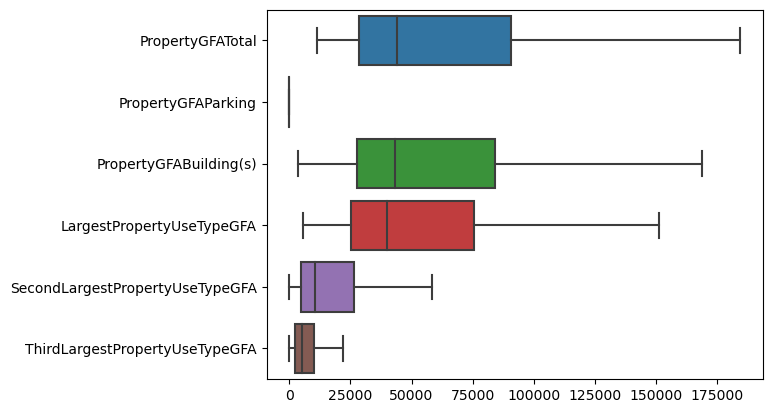

In [36]:
sns.boxplot(df[['PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']],orient='h',showfliers=False)

In [37]:
df['ENERGYSTARScore'].describe()

count    2524.000000
mean       67.966323
std        26.825046
min         1.000000
25%        53.000000
50%        75.000000
75%        90.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

In [38]:
# je supprime les variables numériques inutiles

df = df.drop(['OSEBuildingID','DataYear','ZipCode','Latitude', 'Longitude','SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)',
         'SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','Electricity(kWh)',
         'NaturalGas(therms)','GHGEmissionsIntensity'],axis=1)

C:\Users\matth\AppData\Local\Temp\ipykernel_14888\2718097429.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

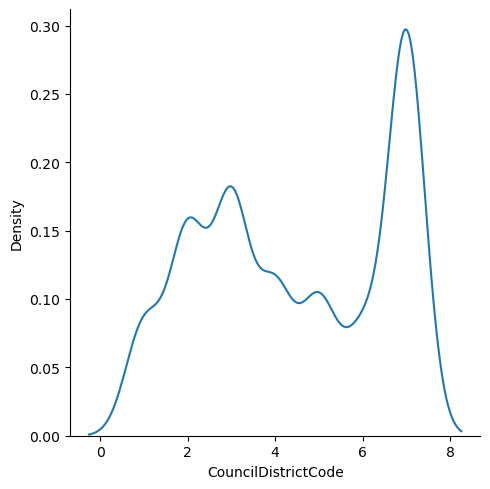

<Figure size 640x480 with 0 Axes>

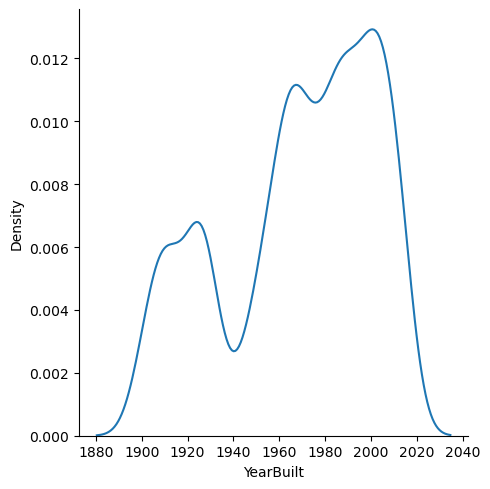

<Figure size 640x480 with 0 Axes>

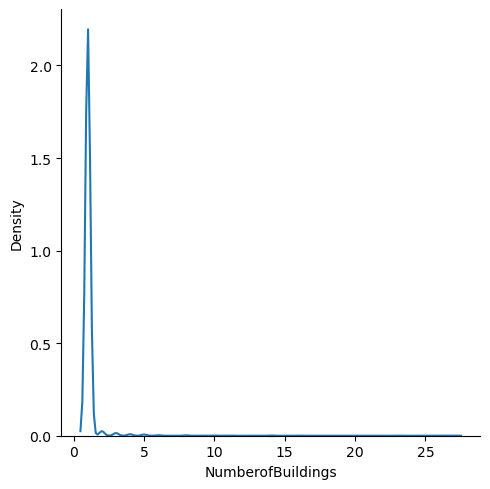

<Figure size 640x480 with 0 Axes>

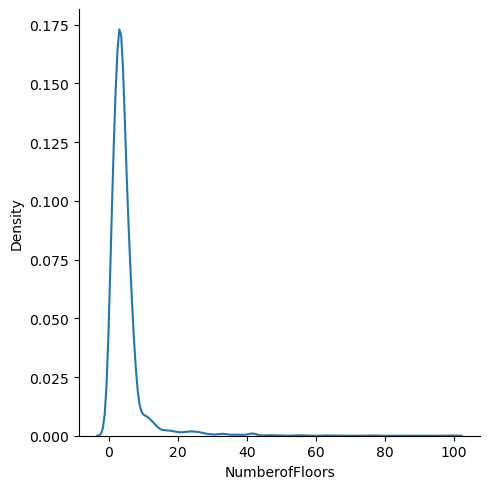

<Figure size 640x480 with 0 Axes>

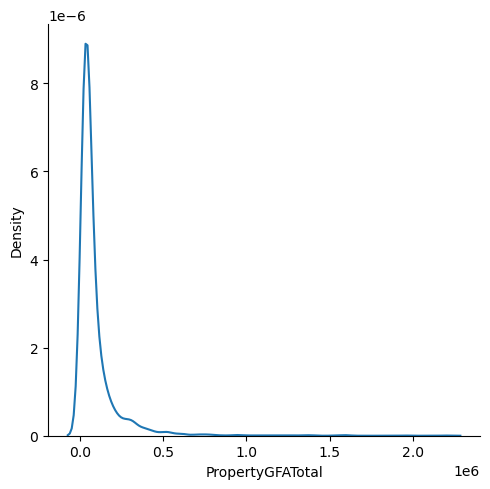

<Figure size 640x480 with 0 Axes>

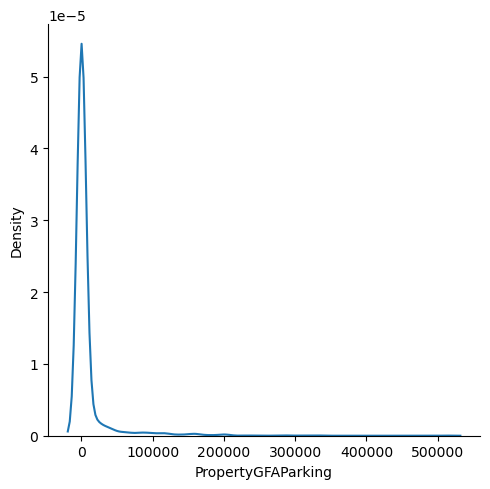

<Figure size 640x480 with 0 Axes>

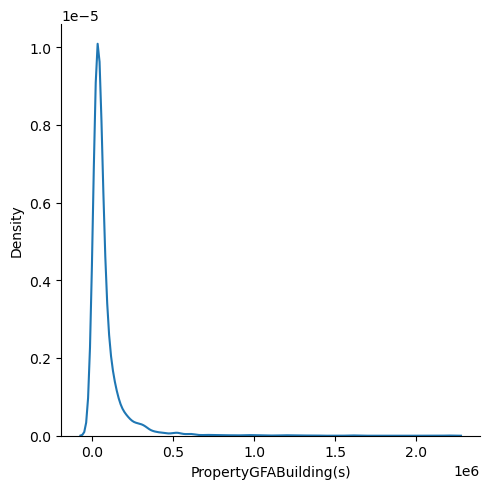

<Figure size 640x480 with 0 Axes>

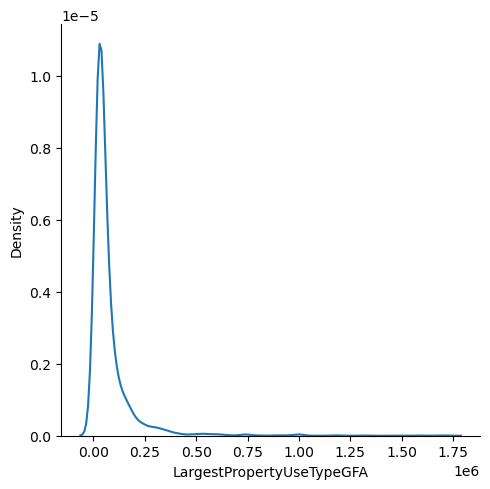

<Figure size 640x480 with 0 Axes>

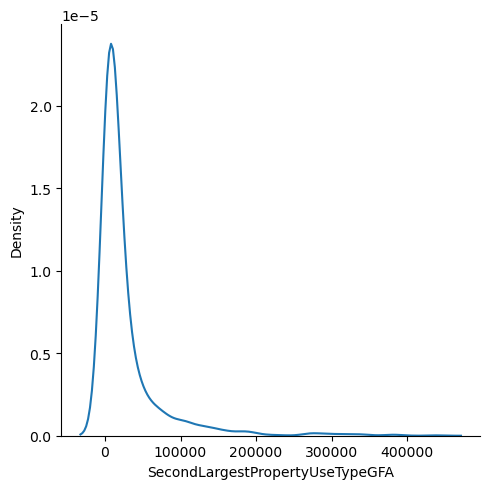

<Figure size 640x480 with 0 Axes>

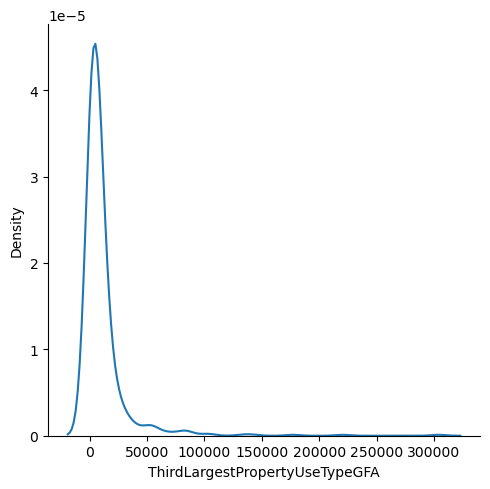

<Figure size 640x480 with 0 Axes>

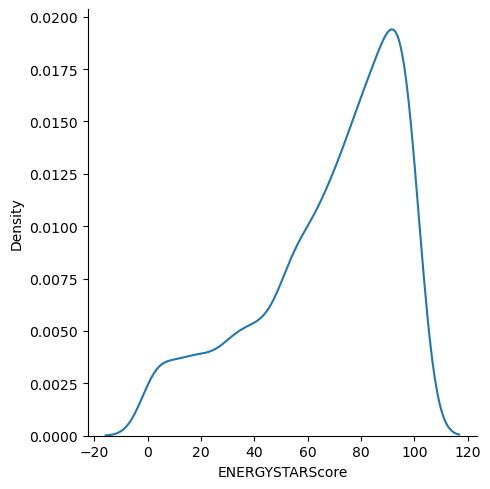

<Figure size 640x480 with 0 Axes>

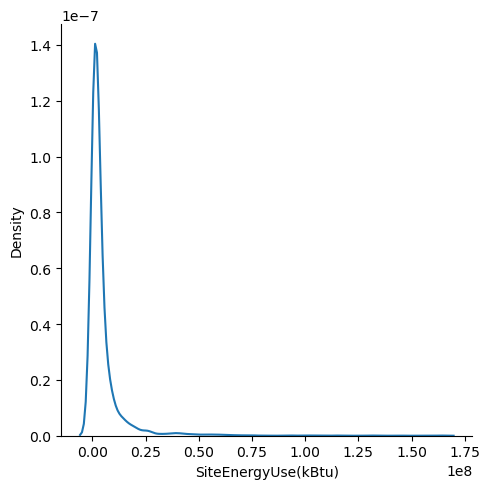

<Figure size 640x480 with 0 Axes>

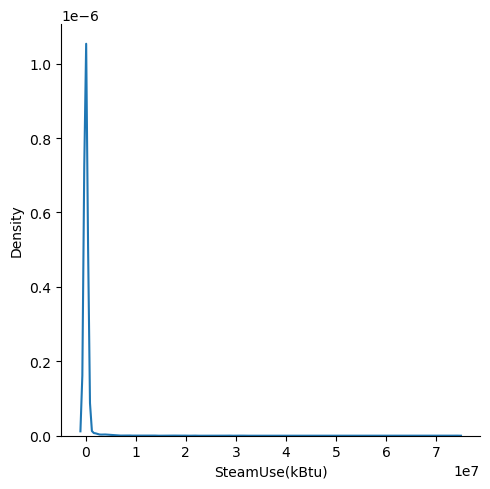

<Figure size 640x480 with 0 Axes>

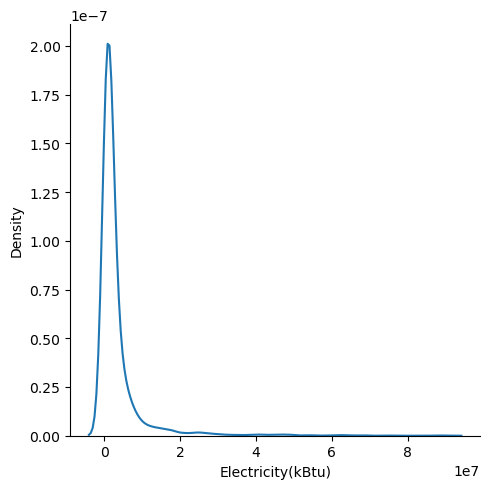

<Figure size 640x480 with 0 Axes>

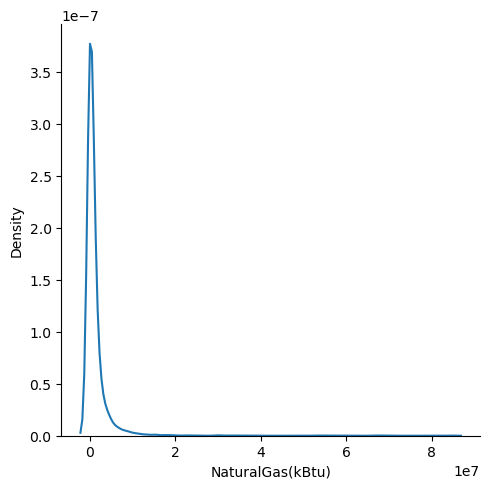

<Figure size 640x480 with 0 Axes>

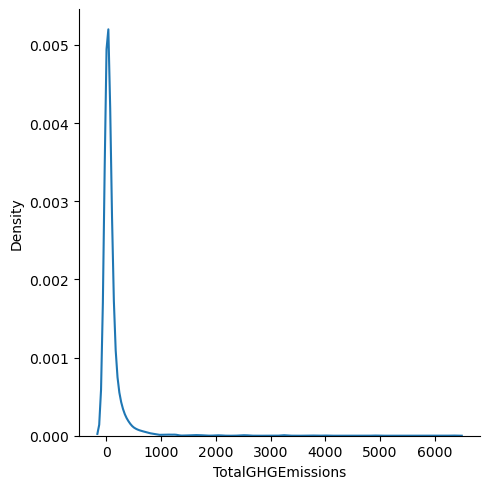

In [39]:
for col in df.select_dtypes(['float','int']) :
    plt.figure()
    sns.displot(df[col],kind='kde')

#### <a name="2b2"> Variable booléenne

In [40]:
df.select_dtypes(['bool'])

DefaultData
0           False
1           False
2           False
3           False
4           False
...           ...
3371         True
3372        False
3373        False
3374        False
3375        False

[3351 rows x 1 columns]

In [41]:
df['DefaultData'].value_counts()

False    3239
True      112
Name: DefaultData, dtype: int64

#### <a name="2b3"> Variables catégorielles

In [42]:
df.select_dtypes(['object']).columns

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address',
       'City', 'State', 'TaxParcelIdentificationNumber', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'YearsENERGYSTARCertified', 'ComplianceStatus', 'Outlier'],
      dtype='object')

In [43]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [44]:
# je supprime les sites résidentiels

df = df.loc[df['BuildingType'].isin(['NonResidential','Nonresidential COS','Nonresidential WA','SPS-District K-12','Campus'])]

In [45]:
df['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

In [46]:
len(df['Neighborhood'].unique())

19

In [47]:
df[['ListOfAllPropertyUseTypes', 'LargestPropertyUseType','SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']]

ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2                                                 Hotel   
3                                                 Hotel   
4                         Hotel, Parking, Swimming Pool   
...                                                 ...   
3371                                             Office   
3372                                 Other - Recreation   
3373  Fitness Center/Health Club/Gym, Other - Recrea...   
3374  Fitness Center/Health Club/Gym, Food Service, ...   
3375  Fitness Center/Health Club/Gym, Food Service, ...   

     LargestPropertyUseType    SecondLargestPropertyUseType  \
0                     Hotel                             NaN   
1                     Hotel                         Parking   
2                     Hotel                             NaN   
3                     Hotel                             NaN   
4                     Hotel                         Parking   
...                     ...                             ...   
3371                 Office                             NaN   
3372     Other - Recreation                             NaN   
3373     Other - Recreation  Fitness Center/Health Club/Gym   
3374     Other - Recreation  Fitness Center/Health Club/Gym   
3375     Other - Recreation  Fitness Center/Health Club/Gym   

     ThirdLargestPropertyUseType  
0                            NaN  
1                     Restaurant  
2                            NaN  
3                            NaN  
4                  Swimming Pool  
...                          ...  
3371                         NaN  
3372                         NaN  
3373               Swimming Pool  
3374          Pre-school/Daycare  
3375          Pre-school/Daycare  

[1653 rows x 4 columns]

In [48]:
df['ComplianceStatus'].value_counts()

Compliant                       1540
Error - Correct Default Data      87
Non-Compliant                     15
Missing Data                      11
Name: ComplianceStatus, dtype: int64

In [49]:
# je ne garde que les sites conformes

df = df[df['ComplianceStatus'] == 'Compliant']

In [50]:
df['Outlier'].value_counts()

Series([], Name: Outlier, dtype: int64)

In [51]:
# je supprime les lignes qui ont un outlier élevé

df = df[~(df['Outlier'] == 'High outlier')]

In [52]:
# je supprime les colonnes inutiles

df = df.drop(['PropertyName', 'Address','City','State','TaxParcelIdentificationNumber','YearsENERGYSTARCertified','Outlier','ComplianceStatus'],axis=1)

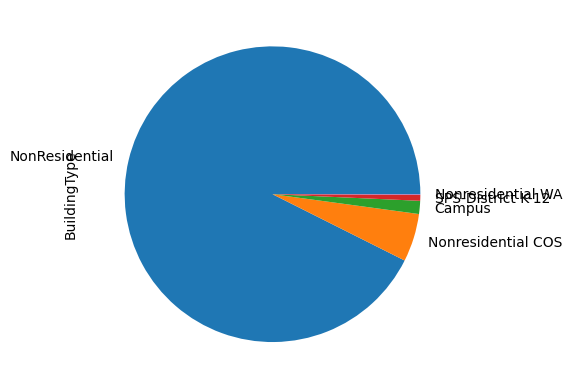

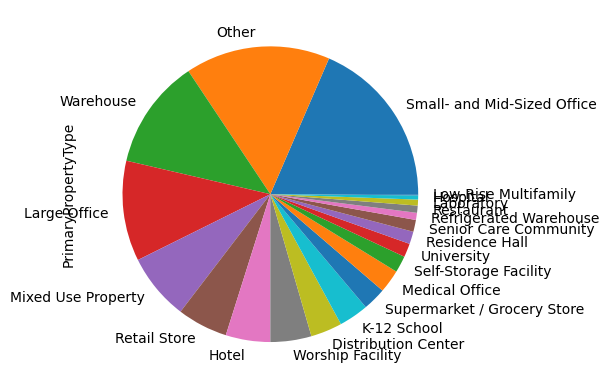

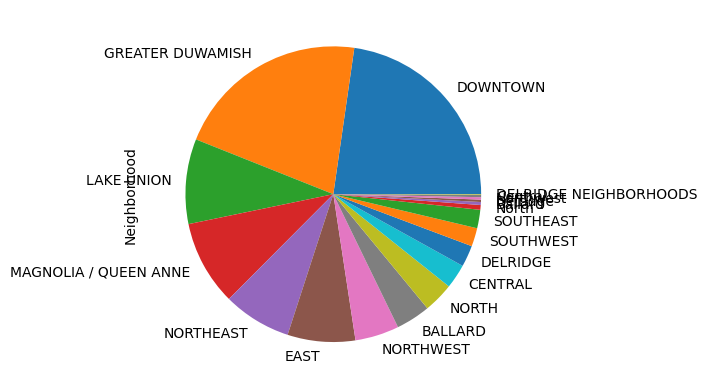

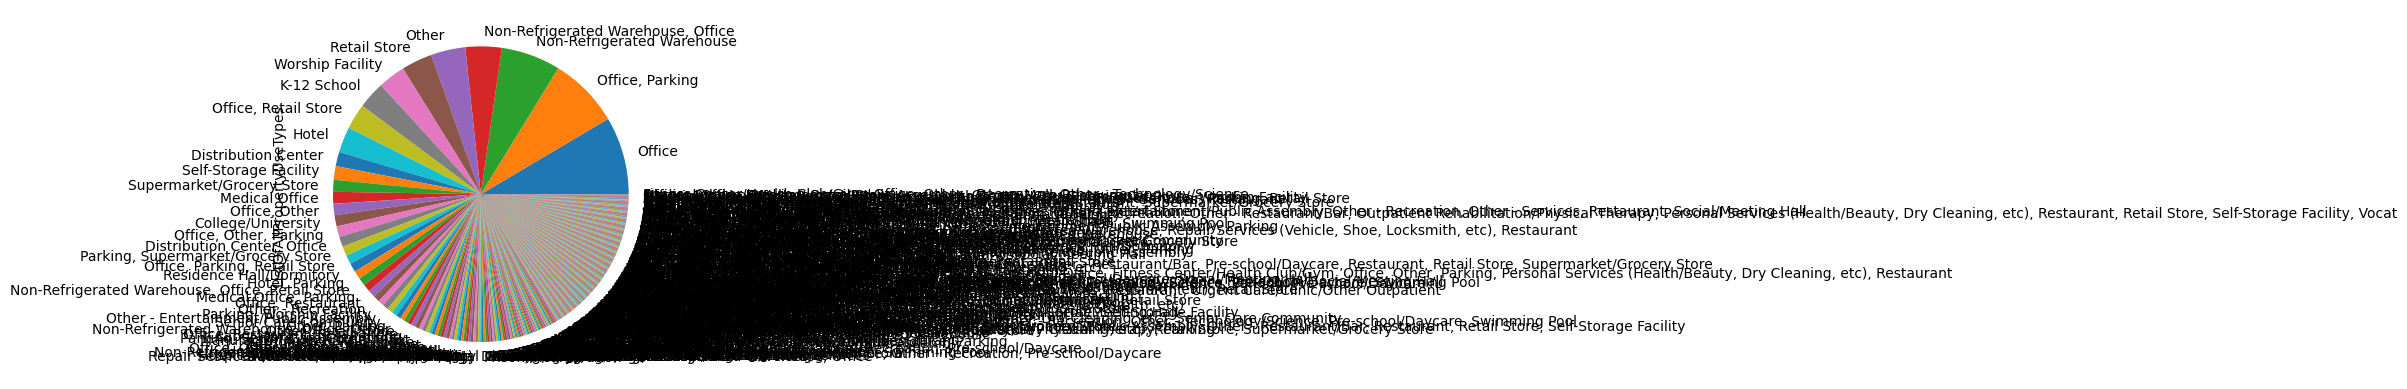

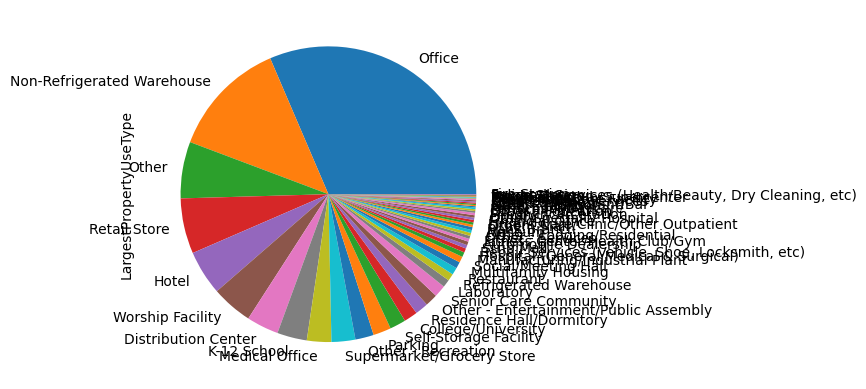

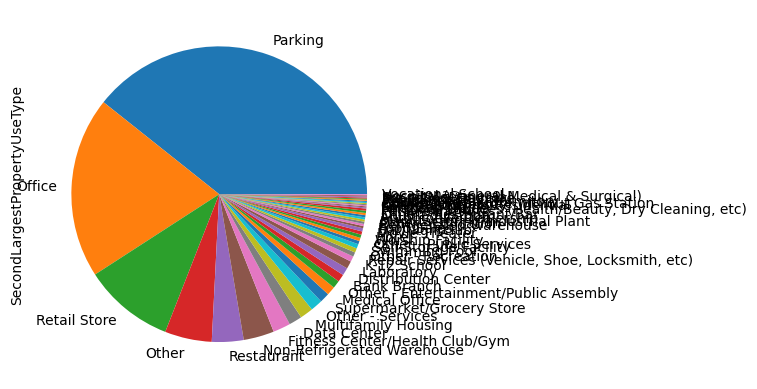

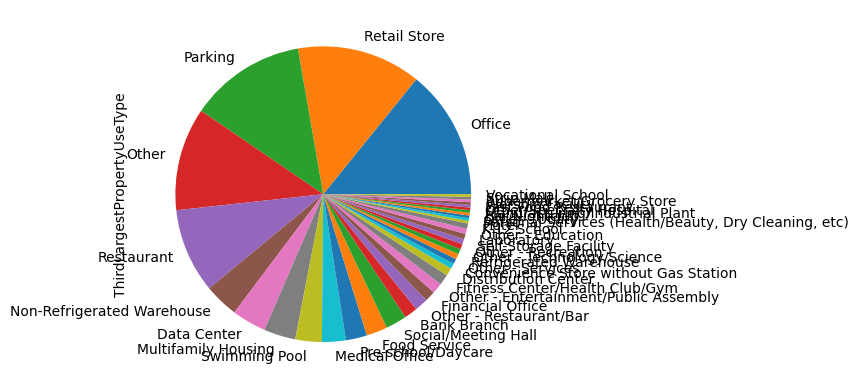

In [53]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

### <a name="2c"> Relation target/variables

In [54]:
df

BuildingType PrimaryPropertyType  CouncilDistrictCode  \
0         NonResidential               Hotel                    7   
1         NonResidential               Hotel                    7   
2         NonResidential               Hotel                    7   
3         NonResidential               Hotel                    7   
4         NonResidential               Hotel                    7   
...                  ...                 ...                  ...   
3370  Nonresidential COS               Other                    1   
3372  Nonresidential COS               Other                    2   
3373  Nonresidential COS               Other                    7   
3374  Nonresidential COS  Mixed Use Property                    1   
3375  Nonresidential COS  Mixed Use Property                    2   

                Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0                   DOWNTOWN       1927                1.0              12   
1                   DOWNTOWN       1996                1.0              11   
2                   DOWNTOWN       1969                1.0              41   
3                   DOWNTOWN       1926                1.0              10   
4                   DOWNTOWN       1980                1.0              18   
...                      ...        ...                ...             ...   
3370  DELRIDGE NEIGHBORHOODS       1982                1.0               1   
3372                DOWNTOWN       2004                1.0               1   
3373   MAGNOLIA / QUEEN ANNE       1974                1.0               1   
3374        GREATER DUWAMISH       1989                1.0               1   
3375        GREATER DUWAMISH       1938                1.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2               956110              196718                  759392   
3                61320                   0                   61320   
4               175580               62000                  113580   
...                ...                 ...                     ...   
3370             18261                   0                   18261   
3372             16000                   0                   16000   
3373             13157                   0                   13157   
3374             14101                   0                   14101   
3375             18258                   0                   18258   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2                                                 Hotel   
3                                                 Hotel   
4                         Hotel, Parking, Swimming Pool   
...                                                 ...   
3370                                 Other - Recreation   
3372                                 Other - Recreation   
3373  Fitness Center/Health Club/Gym, Other - Recrea...   
3374  Fitness Center/Health Club/Gym, Food Service, ...   
3375  Fitness Center/Health Club/Gym, Food Service, ...   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                     Hotel                    88434.0   
1                     Hotel                    83880.0   
2                     Hotel                   756493.0   
3                     Hotel                    61320.0   
4                     Hotel                   123445.0   
...                     ...                        ...   
3370     Other - Recreation                    18261.0   
3372     Other - Recreation                    16000.0   
3373     Other - Recreation                     7583.0   
3374     Other - Recreation                     6601.0   
3375     Other - Recreation                     8271.0   


#### <a name="2c1"> variable booléenne

In [55]:
df.groupby('DefaultData')['SiteEnergyUse(kBtu)'].describe()

count          mean           std          min           25%  \
DefaultData                                                                  
False        1540.0  7.316217e+06  1.347503e+07  57133.19922  1.247002e+06   

                    50%         75%          max  
DefaultData                                       
False        2719050.75  7243102.75  163945984.0

In [56]:
# je supprime DefaultData qui n'a plus qu'une seule valeur

df = df.drop('DefaultData',axis=1)

#### <a name="2c2"> variables numériques

In [57]:
df.select_dtypes(['float','int']).columns


Index(['CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

In [58]:
df.groupby('CouncilDistrictCode')['SiteEnergyUse(kBtu)'].describe().sort_values('mean')

count          mean           std           min  \
CouncilDistrictCode                                                    
6                    102.0  4.179550e+06  7.546438e+06  161311.09380   
2                    365.0  4.215168e+06  8.176910e+06  106918.00000   
1                    100.0  4.897216e+06  8.560494e+06  269016.68750   
4                    157.0  5.520311e+06  8.640696e+06  116486.60160   
5                    120.0  5.661106e+06  1.045398e+07  113130.00000   
7                    511.0  1.039453e+07  1.440173e+07   57133.19922   
3                    185.0  1.056634e+07  2.318875e+07   79711.79688   

                              25%           50%           75%          max  
CouncilDistrictCode                                                         
6                    1.037078e+06  1.827336e+06  4.963010e+06   68090728.0  
2                    9.502762e+05  1.791716e+06  3.978277e+06   74130576.0  
1                    1.139336e+06  2.282373e+06  4.274975e+06   53466684.0  
4                    1.261634e+06  2.520483e+06  5.652231e+06   57764408.0  
5                    1.059430e+06  2.563333e+06  6.746539e+06   98960776.0  
7                    1.777494e+06  4.970047e+06  1.314986e+07   92937640.0  
3                    1.378130e+06  2.882490e+06  8.521989e+06  163945984.0

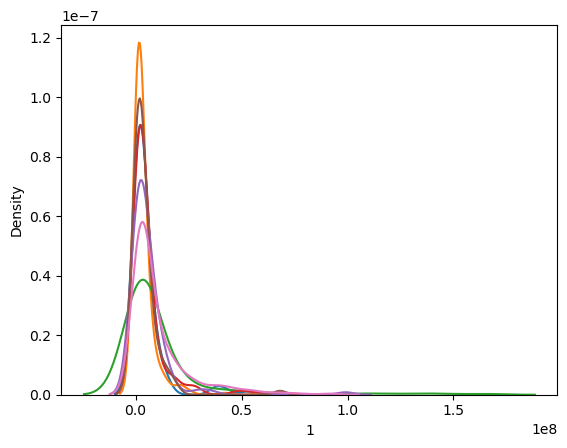

In [59]:
df.groupby('CouncilDistrictCode')['SiteEnergyUse(kBtu)'].apply(lambda x: sns.kdeplot(x, label = x.name))
plt.show()

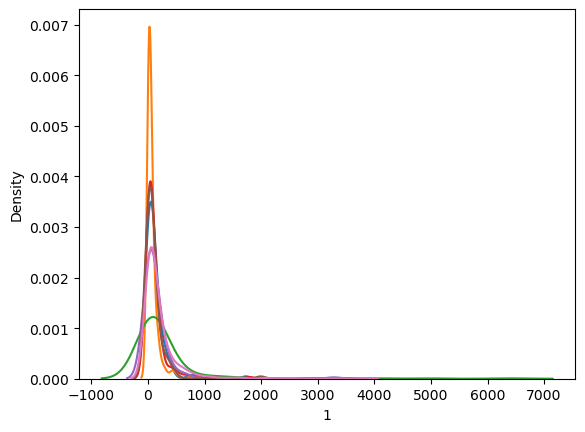

In [60]:
df.groupby('CouncilDistrictCode')['TotalGHGEmissions'].apply(lambda x: sns.kdeplot(x, label = x.name))
plt.show()

In [61]:
df.groupby('NumberofBuildings')['SiteEnergyUse(kBtu)'].mean()

NumberofBuildings
1.0     6.963607e+06
2.0     3.432957e+06
3.0     1.207416e+07
4.0     2.490159e+07
5.0     5.304905e+06
6.0     5.228120e+07
8.0     5.871556e+07
10.0    2.102229e+07
11.0    3.589148e+07
14.0    7.203816e+07
23.0    3.401298e+07
27.0    3.830174e+07
Name: SiteEnergyUse(kBtu), dtype: float64

<AxesSubplot: xlabel='NumberofBuildings'>

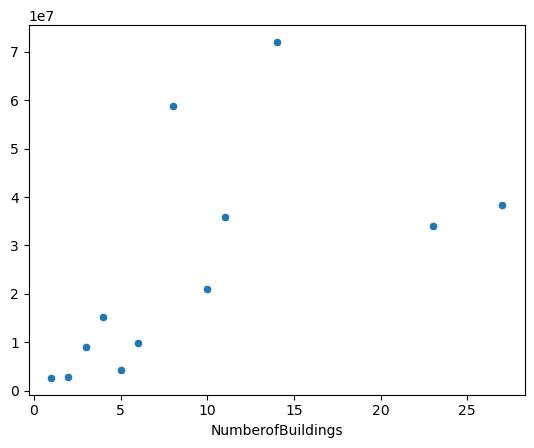

In [62]:
build_targ = df.groupby('NumberofBuildings')['SiteEnergyUse(kBtu)'].median()
sns.scatterplot(x=build_targ.index,y=build_targ.values)

<AxesSubplot: xlabel='NumberofBuildings'>

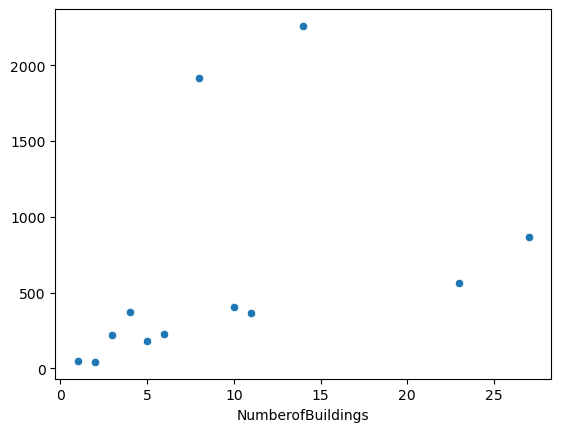

In [63]:
build_targ = df.groupby('NumberofBuildings')['TotalGHGEmissions'].median()
sns.scatterplot(x=build_targ.index,y=build_targ.values)

<AxesSubplot: xlabel='NumberofFloors'>

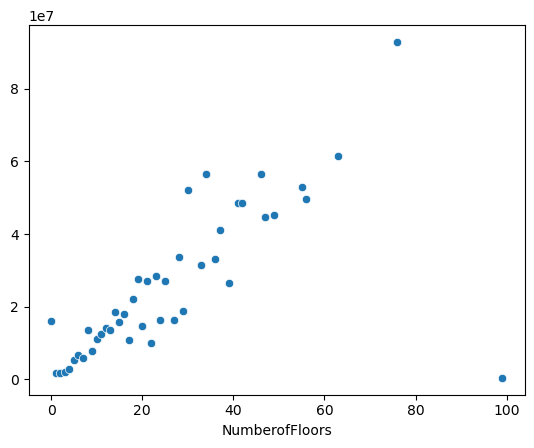

In [64]:
floors_targ = df.groupby('NumberofFloors')['SiteEnergyUse(kBtu)'].median()
sns.scatterplot(x=floors_targ.index,y=floors_targ.values)

<AxesSubplot: xlabel='NumberofFloors'>

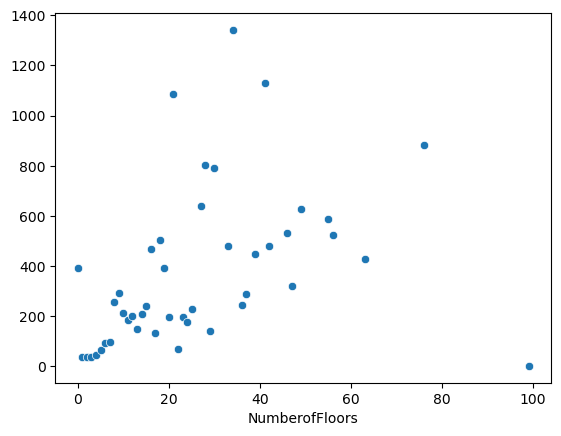

In [65]:
floors_targ = df.groupby('NumberofFloors')['TotalGHGEmissions'].median()
sns.scatterplot(x=floors_targ.index,y=floors_targ.values)

In [66]:
df.loc[df['NumberofFloors'] == 99,:]

BuildingType PrimaryPropertyType  CouncilDistrictCode  \
1359  NonResidential    Worship Facility                    2   

          Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
1359  GREATER DUWAMISH       1977                1.0              99   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
1359             21948                   0                   21948   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
1359          Worship Facility       Worship Facility   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
1359                    21948.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
1359                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
1359                             NaN             80.0          326001.1875   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  
1359             0.0           326001.0               0.0               2.27

In [67]:
# la superficie est petite pour 9 étages, je supprime cette ligne

df = df.loc[df['NumberofFloors'] < 99,:]

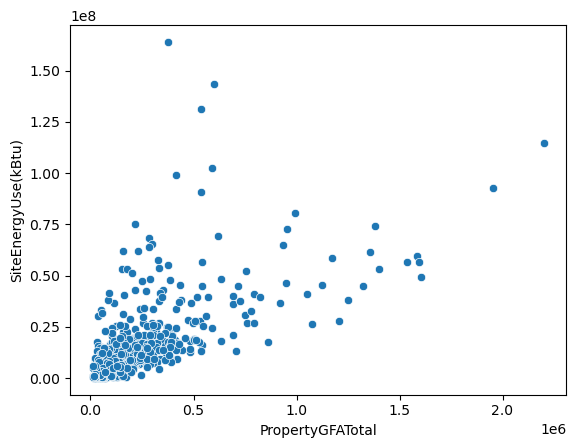

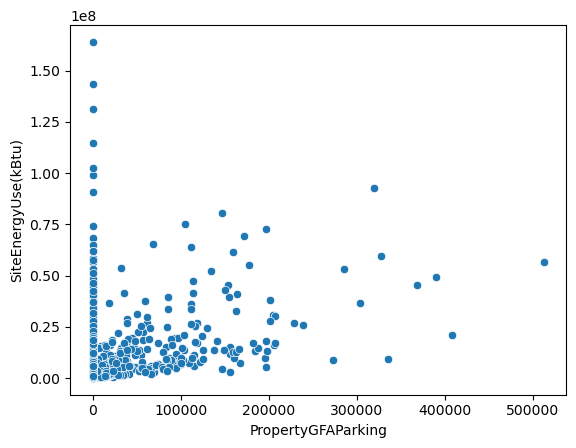

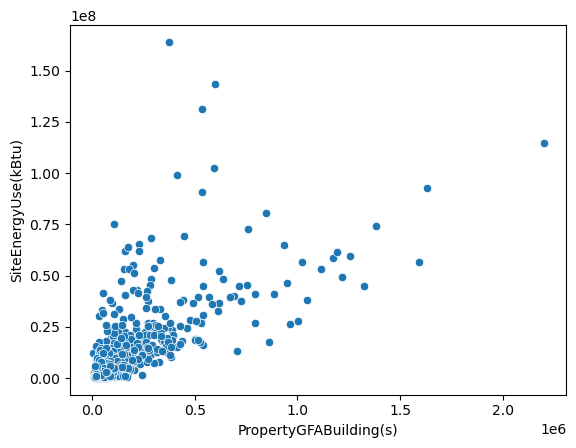

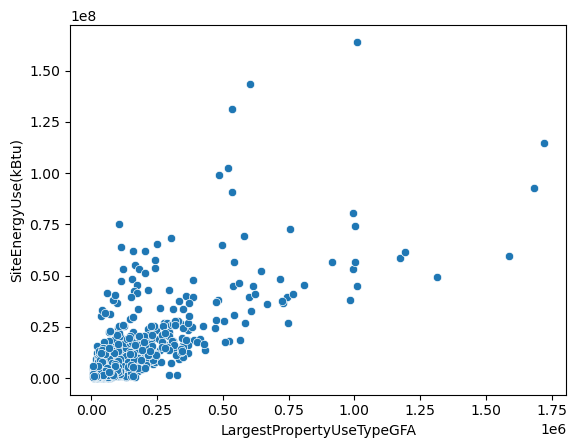

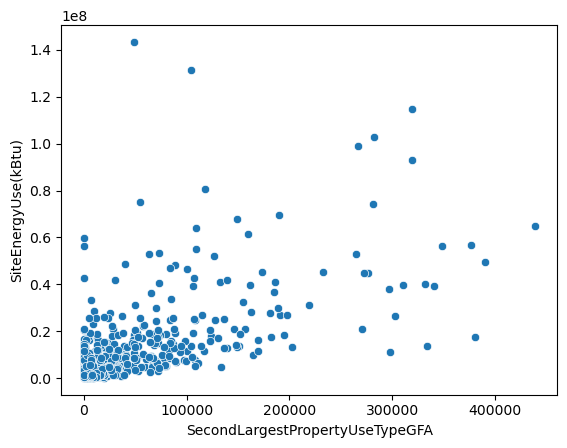

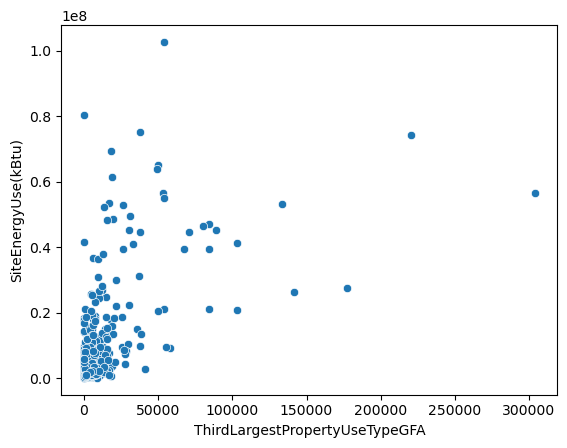

In [68]:
for col in ['PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'] :
    plt.figure()
    sns.scatterplot(data = df,x=col,y='SiteEnergyUse(kBtu)')

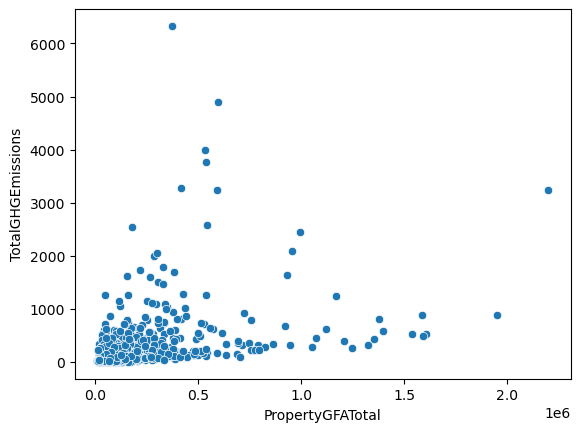

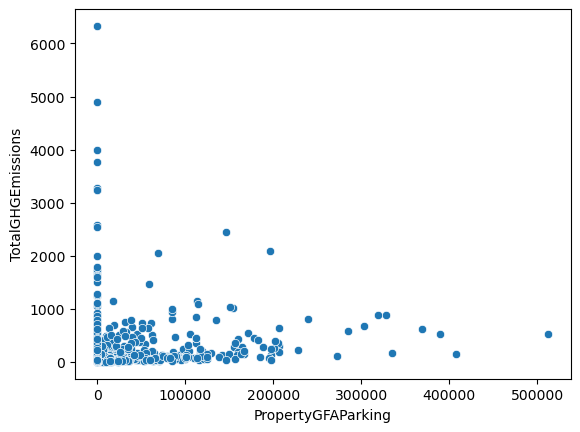

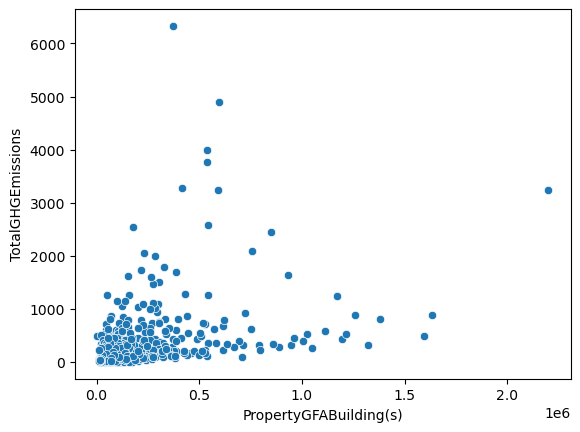

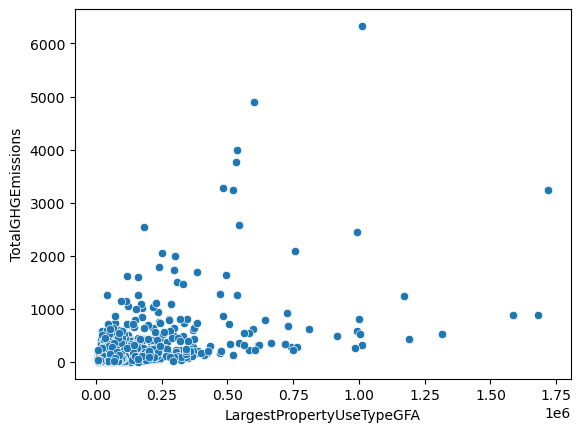

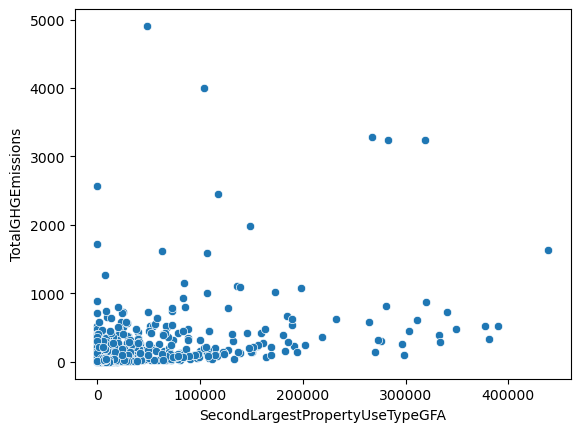

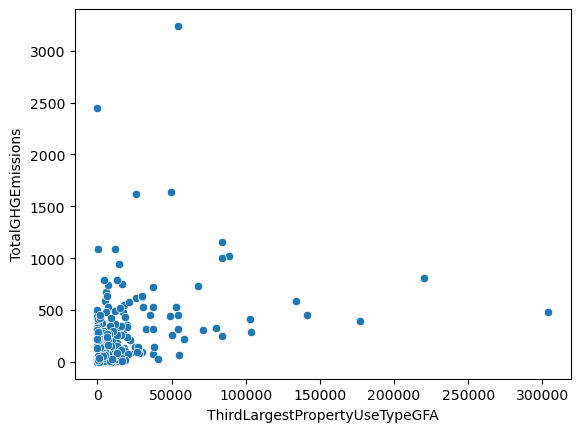

In [69]:
for col in ['PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'] :
    plt.figure()
    sns.scatterplot(data = df,x=col,y='TotalGHGEmissions')

In [70]:
# vérifions que PropertyGFAParking + PropertyGFABuilding(s) = PropertyGFATotal

df['sum_aires'] = df['PropertyGFAParking'] + df['PropertyGFABuilding(s)']
df[['sum_aires','PropertyGFATotal']]

sum_aires  PropertyGFATotal
0         88434             88434
1        103566            103566
2        956110            956110
3         61320             61320
4        175580            175580
...         ...               ...
3370      18261             18261
3372      16000             16000
3373      13157             13157
3374      14101             14101
3375      18258             18258

[1539 rows x 2 columns]

In [71]:
# je compare les 2 valeurs

(df['sum_aires'] == df['PropertyGFATotal']).value_counts()

True    1539
dtype: int64

In [72]:
# les valeurs sont identiques, je supprime sum_aires

df = df.drop('sum_aires',axis=1)

<AxesSubplot: xlabel='ENERGYSTARScore', ylabel='SiteEnergyUse(kBtu)'>

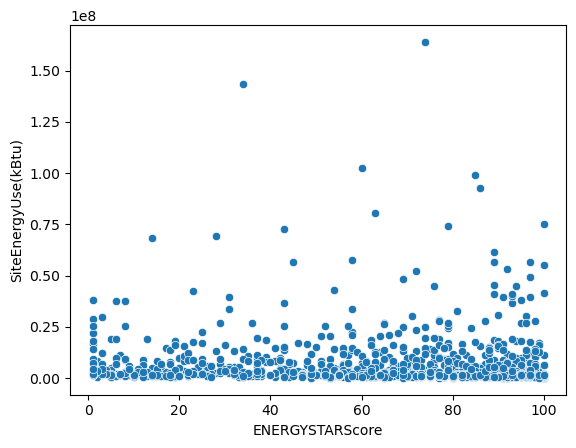

In [73]:
sns.scatterplot(data = df,x='ENERGYSTARScore',y='SiteEnergyUse(kBtu)')

<AxesSubplot: xlabel='ENERGYSTARScore', ylabel='TotalGHGEmissions'>

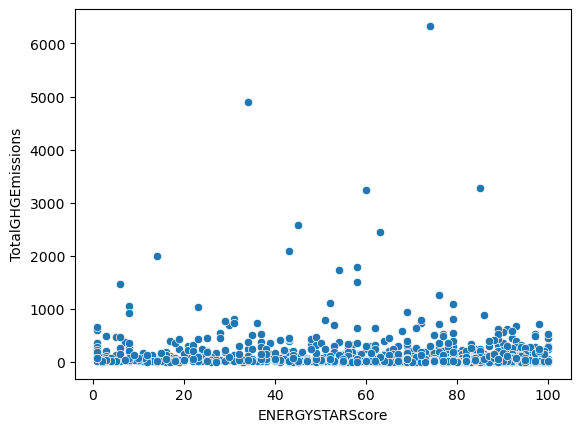

In [74]:
sns.scatterplot(data = df,x='ENERGYSTARScore',y='TotalGHGEmissions')

In [75]:
# vérifions que la sommme de SteamUse, Electricity et NaturalGas donne SiteEnergyUse

df['sum_energie'] = df['SteamUse(kBtu)']+df['Electricity(kBtu)']+df['NaturalGas(kBtu)']
df[['sum_energie','SiteEnergyUse(kBtu)']]

sum_energie  SiteEnergyUse(kBtu)
0     7.226362e+06         7.226362e+06
1     8.387933e+06         8.387933e+06
2     7.258702e+07         7.258702e+07
3     6.794583e+06         6.794584e+06
4     1.417260e+07         1.417261e+07
...            ...                  ...
3370  9.320820e+05         9.320821e+05
3372  9.502760e+05         9.502762e+05
3373  5.765898e+06         5.765898e+06
3374  7.194712e+05         7.194712e+05
3375  1.152896e+06         1.152896e+06

[1539 rows x 2 columns]

In [76]:
# je compare les valeurs en arrondissant

((df['sum_energie']//100) == (df['SiteEnergyUse(kBtu)']//100)).value_counts()

True     1508
False      31
dtype: int64

In [77]:
# regardons les valeurs différentes
    
df[((df['sum_energie']//100) != (df['SiteEnergyUse(kBtu)']//100))]

BuildingType          PrimaryPropertyType  CouncilDistrictCode  \
55        NonResidential                        Hotel                    7   
69    Nonresidential COS                        Other                    7   
70    Nonresidential COS                        Other                    7   
71    Nonresidential COS                        Other                    7   
73    Nonresidential COS                        Other                    7   
75    Nonresidential COS                        Other                    7   
117       NonResidential                        Other                    3   
206       NonResidential                 Large Office                    7   
218       NonResidential                 Large Office                    7   
285       NonResidential                 Large Office                    7   
292       NonResidential                 Large Office                    7   
329       NonResidential                        Other                    3   
371       NonResidential                 Large Office                    6   
403       NonResidential                 Large Office                    7   
553       NonResidential  Small- and Mid-Sized Office                    7   
563       NonResidential                 Large Office                    7   
601       NonResidential  Small- and Mid-Sized Office                    1   
1105      NonResidential                 Large Office                    4   
1280  Nonresidential COS                        Other                    7   
1291  Nonresidential COS                        Other                    7   
1292  Nonresidential COS                        Other                    7   
2037      NonResidential  Small- and Mid-Sized Office                    2   
2441      NonResidential  Small- and Mid-Sized Office                    7   
2667      NonResidential  Small- and Mid-Sized Office                    4   
2761      NonResidential                 Retail Store                    2   
2791      NonResidential           Mixed Use Property                    2   
3182      NonResidential                        Other                    3   
3230      NonResidential                  K-12 School                    5   
3270  Nonresidential COS                        Other                    2   
3275      NonResidential                   University                    4   
3277      NonResidential                   University                    4   

               Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
55    MAGNOLIA / QUEEN ANNE       1998                1.0               6   
69    MAGNOLIA / QUEEN ANNE       1962                1.0               1   
70    MAGNOLIA / QUEEN ANNE       1962                1.0               1   
71    MAGNOLIA / QUEEN ANNE       1938                1.0               5   
73    MAGNOLIA / QUEEN ANNE       1962                1.0               2   
75    MAGNOLIA / QUEEN ANNE       1928                1.0               2   
117                 CENTRAL       1971                3.0               6   
206                DOWNTOWN       1976                1.0              33   
218                DOWNTOWN       1922                1.0              15   
285                DOWNTOWN       1985                1.0              30   
292                DOWNTOWN       1989                1.0              56   
329                    EAST       1975                1.0               8   
371              LAKE UNION       1999                1.0               3   
403              LAKE UNION       2005                1.0               6   
553                DOWNTOWN       1902                1.0               3   
563                DOWNTOWN       1979                1.0               7   
601                Delridge       1929                1.0               3   
1105             LAKE UNION       2013                1.0               5   
1280  MAGNOLIA / QUEEN ANNE       1992              

In [78]:
# regardons le ratio sum_energie/SiteEnergyUse(kBtu) pour ces lignes

df['ratio'] =  ((df['sum_energie']//100) / (df['SiteEnergyUse(kBtu)']//100))
df.loc[df['ratio']!=1,['ratio','sum_energie','SiteEnergyUse(kBtu)' ]].sort_values('ratio')

ratio   sum_energie  SiteEnergyUse(kBtu)
2761  0.209681  2.049950e+05         9.772303e+05
2791  0.279864  1.323792e+06         4.729846e+06
601   0.508412  1.929519e+07         3.795171e+07
3277  0.559225  2.861461e+07         5.116831e+07
3275  0.743736  3.719217e+06         5.000717e+06
71    0.812026  1.701602e+07         2.095503e+07
1280  0.813478  2.021951e+06         2.485521e+06
2037  0.861271  1.815369e+06         2.107744e+06
403   0.869565  7.877393e+06         9.058916e+06
69    0.896107  2.120098e+07         2.365898e+07
75    0.899953  1.864991e+07         2.072325e+07
73    0.915416  2.495729e+06         2.726369e+06
1292  0.931144  1.706659e+06         1.832809e+06
1291  0.962455  2.737835e+06         2.844685e+06
70    0.967216  7.874245e+06         8.141156e+06
3270  0.968500  8.947410e+05         9.238128e+05
3230  0.981468  1.631290e+06         1.662054e+06
3182  0.994357  4.234377e+07         4.258403e+07
371   0.999788  1.132316e+07         1.132551e+07
329   0.999812  6.175078e+07         6.176238e+07
1105  0.999933  4.489301e+06         4.489661e+06
55    0.999985  6.836899e+06         6.836900e+06
553   0.999992  1.202960e+07         1.202960e+07
117   0.999992  1.307170e+07         1.307170e+07
218   0.999995  1.857690e+07         1.857690e+07
292   0.999998  4.951770e+07         4.951770e+07
285   0.999998  5.222620e+07         5.222620e+07
2667  1.000091  1.100500e+06         1.100500e+06
206   1.012977  4.137789e+07         4.084775e+07
563   1.214382  6.287167e+06         5.177270e+06
2441  1.237360  2.589388e+06         2.092696e+06

In [79]:
# je supprime les lignes dont le ratio est inférieur à 0.8

df = df[~(df['ratio'] < 0.8)]

In [80]:
# je supprime les variables sum_energie et ratio qui ne me serviront plus

df = df.drop(['sum_energie','ratio'],axis=1)

#### <a name="2c3"> variables catégorielles

In [81]:
df.select_dtypes(['object']).columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'],
      dtype='object')

In [82]:
df['BuildingType'].value_counts()

NonResidential        1420
Nonresidential COS      81
Campus                  22
SPS-District K-12       10
Nonresidential WA        1
Name: BuildingType, dtype: int64

In [83]:
df.groupby('BuildingType')['SiteEnergyUse(kBtu)'].describe()

count          mean           std           min  \
BuildingType                                                           
Campus                22.0  2.856608e+07  3.740139e+07  1.622231e+06   
NonResidential      1420.0  7.016755e+06  1.275434e+07  5.713320e+04   
Nonresidential COS    81.0  6.236443e+06  8.444464e+06  4.214300e+05   
Nonresidential WA      1.0  3.180819e+06           NaN  3.180819e+06   
SPS-District K-12     10.0  6.624163e+06  6.594517e+06  1.298308e+06   

                             25%           50%           75%           max  
BuildingType                                                                
Campus              4.193044e+06  1.138910e+07  3.542186e+07  1.313739e+08  
NonResidential      1.219834e+06  2.630034e+06  6.917330e+06  1.639460e+08  
Nonresidential COS  1.631479e+06  3.076813e+06  8.086944e+06  6.157618e+07  
Nonresidential WA   3.180819e+06  3.180819e+06  3.180819e+06  3.180819e+06  
SPS-District K-12   1.489953e+06  3.715816e+06  1.091326e+07  2.067592e+07

In [84]:
df.groupby('BuildingType')['TotalGHGEmissions'].describe()

count        mean          std    min       25%      50%  \
BuildingType                                                                    
Campus                22.0  755.004091  1213.839147  26.34  102.9475  267.495   
NonResidential      1420.0  146.567901   349.513634   0.40   19.8175   48.240   
Nonresidential COS    81.0  145.547037   158.263330   2.94   29.1800   86.020   
Nonresidential WA      1.0   22.170000          NaN  22.17   22.1700   22.170   
SPS-District K-12     10.0  162.902000   147.277675  20.30   34.3850  136.165   

                        75%      max  
BuildingType                          
Campus              620.930  3995.45  
NonResidential      133.635  6330.91  
Nonresidential COS  204.080   804.20  
Nonresidential WA    22.170    22.17  
SPS-District K-12   258.695   443.73

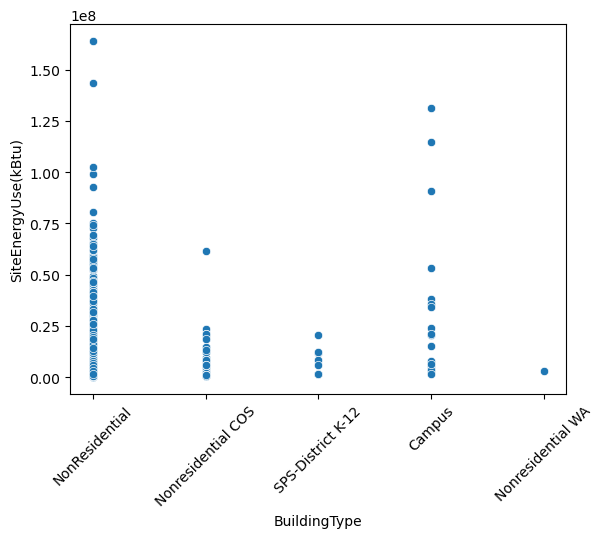

In [85]:
sns.scatterplot(x=df['BuildingType'], y=df['SiteEnergyUse(kBtu)'])
plt.xticks(rotation=45)
plt.show()

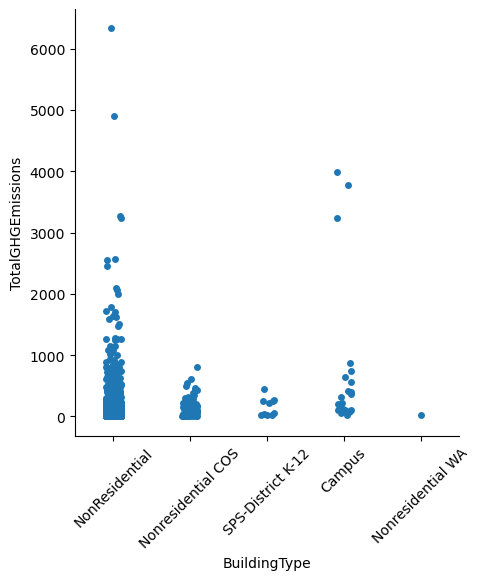

In [86]:
sns.catplot(x=df['BuildingType'], y=df['TotalGHGEmissions'])
plt.xticks(rotation=45)
plt.show()

In [87]:
df.groupby('PrimaryPropertyType')['SiteEnergyUse(kBtu)'].describe().sort_values('mean')

count          mean           std           min  \
PrimaryPropertyType                                                            
Self-Storage Facility         28.0  9.321726e+05  1.049640e+06  5.713320e+04   
Worship Facility              68.0  1.215792e+06  9.663007e+05  2.161150e+05   
Warehouse                    185.0  1.977034e+06  3.707228e+06  7.971180e+04   
Distribution Center           53.0  2.405360e+06  3.794992e+06  1.501678e+05   
Small- and Mid-Sized Office  284.0  2.545163e+06  1.935184e+06  3.615421e+05   
K-12 School                   50.0  2.873685e+06  2.552236e+06  8.056435e+05   
Low-Rise Multifamily           2.0  2.887768e+06  1.259480e+06  1.997182e+06   
Refrigerated Warehouse        12.0  3.719428e+06  5.106499e+06  6.426452e+05   
Residence Hall                21.0  3.810723e+06  3.576453e+06  6.051307e+05   
Retail Store                  84.0  5.008903e+06  6.409232e+06  1.629600e+05   
Restaurant                    12.0  5.263898e+06  3.255826e+06  8.999242e+05   
Other                        244.0  8.145292e+06  1.392237e+07  1.174384e+05   
Mixed Use Property           111.0  8.164654e+06  1.414332e+07  2.298564e+05   
Supermarket / Grocery Store   39.0  1.003563e+07  3.400703e+06  1.906385e+06   
Senior Care Community         20.0  1.151729e+07  1.126398e+07  1.076733e+06   
Medical Office                39.0  1.197166e+07  1.715173e+07  8.174096e+05   
Hotel                         75.0  1.209144e+07  1.580467e+07  7.162797e+05   
Large Office                 169.0  1.751490e+07  1.543781e+07  1.363192e+06   
University                    21.0  1.880252e+07  3.063779e+07  3.237394e+05   
Laboratory                    10.0  2.629313e+07  1.576819e+07  7.251589e+06   
Hospital                       7.0  8.241889e+07  5.699840e+07  2.037721e+06   

                                      25%           50%           75%  \
PrimaryPropertyType                                                     
Self-Storage Facility        4.567272e+05  7.752228e+05  1.036554e+06   
Worship Facility             6.522045e+05  9.191494e+05  1.562253e+06   
Warehouse                    5.959365e+05  1.252324e+06  2.225512e+06   
Distribution Center          6.597619e+05  1.157976e+06  2.581742e+06   
Small- and Mid-Sized Office  1.269140e+06  2.054567e+06  3.209046e+06   
K-12 School                  1.338886e+06  1.732190e+06  3.438531e+06   
Low-Rise Multifamily         2.442475e+06  2.887768e+06  3.333062e+06   
Refrigerated Warehouse       1.029709e+06  1.481031e+06  3.149600e+06   
Residence Hall               1.594505e+06  2.717863e+06  4.926695e+06   
Retail Store                 1.259767e+06  2.549584e+06  6.541126e+06   
Restaurant                   3.176243e+06  4.722848e+06  7.125782e+06   
Other                        1.581274e+06  3.423732e+06  8.100496e+06   
Mixed Use Property           1.160985e+06  2.371575e+06  7.027367e+06   
Supermarket / Grocery Store  7.896877e+06  9.290214e+06  1.313690e+07   
Senior Care Community        5.034142e+06  7.366733e+06  1.321218e+07   
Medical Office               2.150988e+06  5.792926e+06  1.697793e+07   
Hotel                        3.684817e+06  6.505995e+06  1.233125e+07   
Large Office                 6.962073e+06  1.321442e+07  2.116950e+07   
University                   2.839882e+06  4.116872e+06  1.637815e+07   
Laboratory                   1.169957e+07  2.883182e+07  3.575576e+07   
Hospital                     5.023702e+07  6.809073e+07  1.211919e+08   

                                     max  
PrimaryPropertyType                       
Self-Storage Facility          5697472.5  
Worship Facility               5587347.0  
Warehouse                     44731160.0  
Distribution Center           21795830.0  
Small- and Mid-Sized Office   16319835.0  
K-12 School                   12265516.0  
Low-Rise Multifamily           3778355.0  
Refrigerated Warehouse        17695420.0  
Residence Hall                15965859.0  
Retail Store                  40062

In [88]:
df.groupby('PrimaryPropertyType')['TotalGHGEmissions'].describe().sort_values('mean')

count         mean          std    min  \
PrimaryPropertyType                                                   
Self-Storage Facility         28.0    24.098929    32.926256   0.40   
Low-Rise Multifamily           2.0    25.970000     0.523259  25.60   
Refrigerated Warehouse        12.0    37.614167    46.295382   4.48   
Small- and Mid-Sized Office  284.0    40.742394    44.681376   2.52   
Warehouse                    185.0    42.878432    58.981371   0.63   
Worship Facility              68.0    43.987206    40.685781   1.51   
Distribution Center           53.0    50.225660    76.135354   1.06   
Retail Store                  84.0    95.285357   132.170057   1.14   
K-12 School                   50.0    97.233600    85.890378   6.49   
Residence Hall                21.0   101.265714   102.459050   4.22   
Mixed Use Property           111.0   159.785766   266.151905   1.60   
Other                        244.0   190.841434   370.522273   0.82   
Restaurant                    12.0   192.514167   165.175873   9.47   
Large Office                 169.0   206.981953   205.094248   9.50   
Supermarket / Grocery Store   39.0   228.301282   110.255373  13.29   
Medical Office                39.0   261.954872   547.204349   6.53   
Senior Care Community         20.0   371.899500   412.790453  23.15   
Hotel                         75.0   388.595733   523.930322   4.99   
University                    21.0   558.063333  1035.971336   6.33   
Laboratory                    10.0   849.424000   729.655415  50.55   
Hospital                       7.0  2763.197143  2224.233902  14.21   

                                   25%       50%        75%      max  
PrimaryPropertyType                                                   
Self-Storage Facility           3.8975    13.045    30.3750   163.83  
Low-Rise Multifamily           25.7850    25.970    26.1550    26.34  
Refrigerated Warehouse          8.9375    18.755    36.0275   142.36  
Small- and Mid-Sized Office    13.8325    25.785    46.5375   293.55  
Warehouse                       8.4900    22.440    58.6700   391.70  
Worship Facility               20.8800    32.430    51.6650   247.97  
Distribution Center            11.0800    22.100    48.5000   455.39  
Retail Store                   22.9900    42.350   102.7775   723.47  
K-12 School                    43.2125    65.540   120.0575   443.73  
Residence Hall                 48.5300    64.510   129.3900   437.20  
Mixed Use Property             21.5450    44.680   151.5100  1623.34  
Other                          32.5450    73.915   195.1100  3995.45  
Restaurant                     91.2025   167.190   238.5850   611.19  
Large Office                   66.4800   130.730   246.8300  1084.79  
Supermarket / Grocery Store   158.7750   226.730   305.0950   414.43  
Medical Office                 26.2650    77.990   248.3150  3238.24  
Senior Care Community         155.9275   203.470   512.9500  1727.11  
Hotel                         121.4550   208.260   390.2650  2573.75  
University                     61.6800   104.260   441.9400  3768.66  
Laboratory                    307.8950   718.495  1138.1550  2549.47  
Hospital                     1411.1600  1990.500  4092.2200  6330.91

In [89]:
df.groupby('Neighborhood')['TotalGHGEmissions'].describe().sort_values('mean')


count        mean         std    min      25%  \
Neighborhood                                                            
DELRIDGE NEIGHBORHOODS    1.0   20.330000         NaN  20.33  20.3300   
Ballard                   5.0   25.736000   14.507911   6.35  14.4900   
Delridge                  3.0   28.196667   20.936978   4.20  20.9250   
GREATER DUWAMISH        326.0   71.556626  126.401173   0.75  13.3300   
Northwest                 4.0   72.735000   87.318370  18.66  29.1450   
NORTH                    51.0   89.074118  126.724308   0.86  17.3850   
North                     8.0   97.878750   99.280745  41.70  45.9375   
DELRIDGE                 36.0  111.670833  160.836212   2.15  30.3725   
SOUTHEAST                31.0  115.749032  180.320848   0.82  19.1600   
NORTHEAST               113.0  119.428407  212.355773   1.51  23.5200   
BALLARD                  58.0  120.999310  274.510045   1.12  22.1100   
Central                   4.0  132.820000  127.065351   7.12  41.5450   
MAGNOLIA / QUEEN ANNE   143.0  133.579161  342.687578   0.40  20.9550   
NORTHWEST                74.0  160.969595  395.662745   1.59  22.0925   
SOUTHWEST                31.0  163.897419  312.640416   3.71  23.6750   
CENTRAL                  41.0  189.423902  758.900154   0.79  29.1800   
LAKE UNION              143.0  198.302727  413.120945   0.81  22.5150   
DOWNTOWN                348.0  211.985718  351.486173   0.63  28.1575   
EAST                    114.0  301.377982  781.465536   0.87  28.8050   

                            50%       75%      max  
Neighborhood                                        
DELRIDGE NEIGHBORHOODS   20.330   20.3300    20.33  
Ballard                  31.790   37.3400    38.71  
Delridge                 37.650   40.1950    42.74  
GREATER DUWAMISH         33.755   76.3325  1246.55  
Northwest                34.535   78.1250   203.21  
NORTH                    42.030  101.4150   723.47  
North                    65.135   86.7125   338.58  
DELRIDGE                 55.060  110.2575   866.23  
SOUTHEAST                33.230   85.6600   717.93  
NORTHEAST                53.650  128.6600  1789.69  
BALLARD                  37.545  110.8250  1990.50  
Central                 118.915  210.1900   286.33  
MAGNOLIA / QUEEN ANNE    47.080  116.0850  3768.66  
NORTHWEST                48.965  176.5350  3278.11  
SOUTHWEST                48.990  186.9500  1727.11  
CENTRAL                  51.140   89.8000  4906.33  
LAKE UNION               61.860  207.9100  3995.45  
DOWNTOWN                 92.720  247.1150  2573.75  
EAST                     78.605  183.5450  6330.91

## <a name="3"> 3) Analyse plus détaillée

In [90]:
# vérifions qu'il n'y a pas d'incohérence entre LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, 
# ThirdLargestPropertyUseTypeGFA et PropertyGFATotal

# je remplace d'abord les valeurs manquantes par 0
for col in ['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA'] :
    df[col].fillna(0,inplace=True)


In [91]:
# vérifions que LargestPropertyUseTypeGFA est inférieur à PropertyGFATotal

df.loc[df['LargestPropertyUseTypeGFA'] > df['PropertyGFATotal'],['PropertyGFATotal','LargestPropertyUseTypeGFA','ListOfAllPropertyUseTypes']]

PropertyGFATotal  LargestPropertyUseTypeGFA  \
11              333176                   336640.0   
43              332210                   348630.0   
59              217603                   296313.0   
66               58320                    72072.0   
72              571329                   598801.0   
...                ...                        ...   
3294             33648                    83600.0   
3319            144614                   159500.0   
3322            108036                   202171.0   
3347             45000                    45728.0   
3359             68072                    68916.0   

           ListOfAllPropertyUseTypes  
11                             Hotel  
43                             Hotel  
59    Parking, Senior Care Community  
66                      Retail Store  
72            Office, Other, Parking  
...                              ...  
3294  Automobile Dealership, Parking  
3319                           Hotel  
3322  Automobile Dealership, Parking  
3347            K-12 School, Parking  
3359              College/University  

[178 rows x 3 columns]

In [92]:
# Pour ces sites, je limite la superficie de LargestPropertyUseTypeGFA à la surface totale

df.loc[df['LargestPropertyUseTypeGFA'] > df['PropertyGFATotal'],'LargestPropertyUseTypeGFA'] = df['PropertyGFATotal']

In [93]:
# regardons avec SecondLargestPropertyUseTypeGFA 

df.loc[df['SecondLargestPropertyUseTypeGFA'] > df['PropertyGFATotal'],['PropertyGFATotal','SecondLargestPropertyUseTypeGFA','LargestPropertyUseTypeGFA','ListOfAllPropertyUseTypes']]

PropertyGFATotal  SecondLargestPropertyUseTypeGFA  \
3132             21931                          31845.0   
3294             33648                          39000.0   

      LargestPropertyUseTypeGFA       ListOfAllPropertyUseTypes  
3132                    21931.0                          Office  
3294                    33648.0  Automobile Dealership, Parking

In [94]:
# Pour ces sites, je remplace la superficie de SecondLargestPropertyUseTypeGFA par la surface totale - LargestPropertyUseTypeGFA

df.loc[df['SecondLargestPropertyUseTypeGFA'] > df['PropertyGFATotal'],'SecondLargestPropertyUseTypeGFA'] = df['PropertyGFATotal'] - df['LargestPropertyUseTypeGFA']    

In [95]:
# regardons avec ThirdLargestPropertyUseTypeGFA 

df.loc[df['ThirdLargestPropertyUseTypeGFA'] > df['PropertyGFATotal'],['PropertyGFATotal','ThirdLargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','LargestPropertyUseTypeGFA','ListOfAllPropertyUseTypes']]

Empty DataFrame
Columns: [PropertyGFATotal, ThirdLargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, LargestPropertyUseTypeGFA, ListOfAllPropertyUseTypes]
Index: []

In [96]:
# modifions la variable YearBuilt pour regrouper les années

def annee_constr (annee) :
    if annee < 2000 :
        annee = (annee - 1900)//10
        return f'19{annee}0-19{annee}9'
    else :
        annee = (annee - 2000)//10
        return f'20{annee}0-20{annee}9'
    
df['YearBuilt'] = df['YearBuilt'].apply(lambda x : annee_constr(x))

In [97]:
var_num = df.select_dtypes(['float','int']).columns
var_num

Index(['CouncilDistrictCode', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

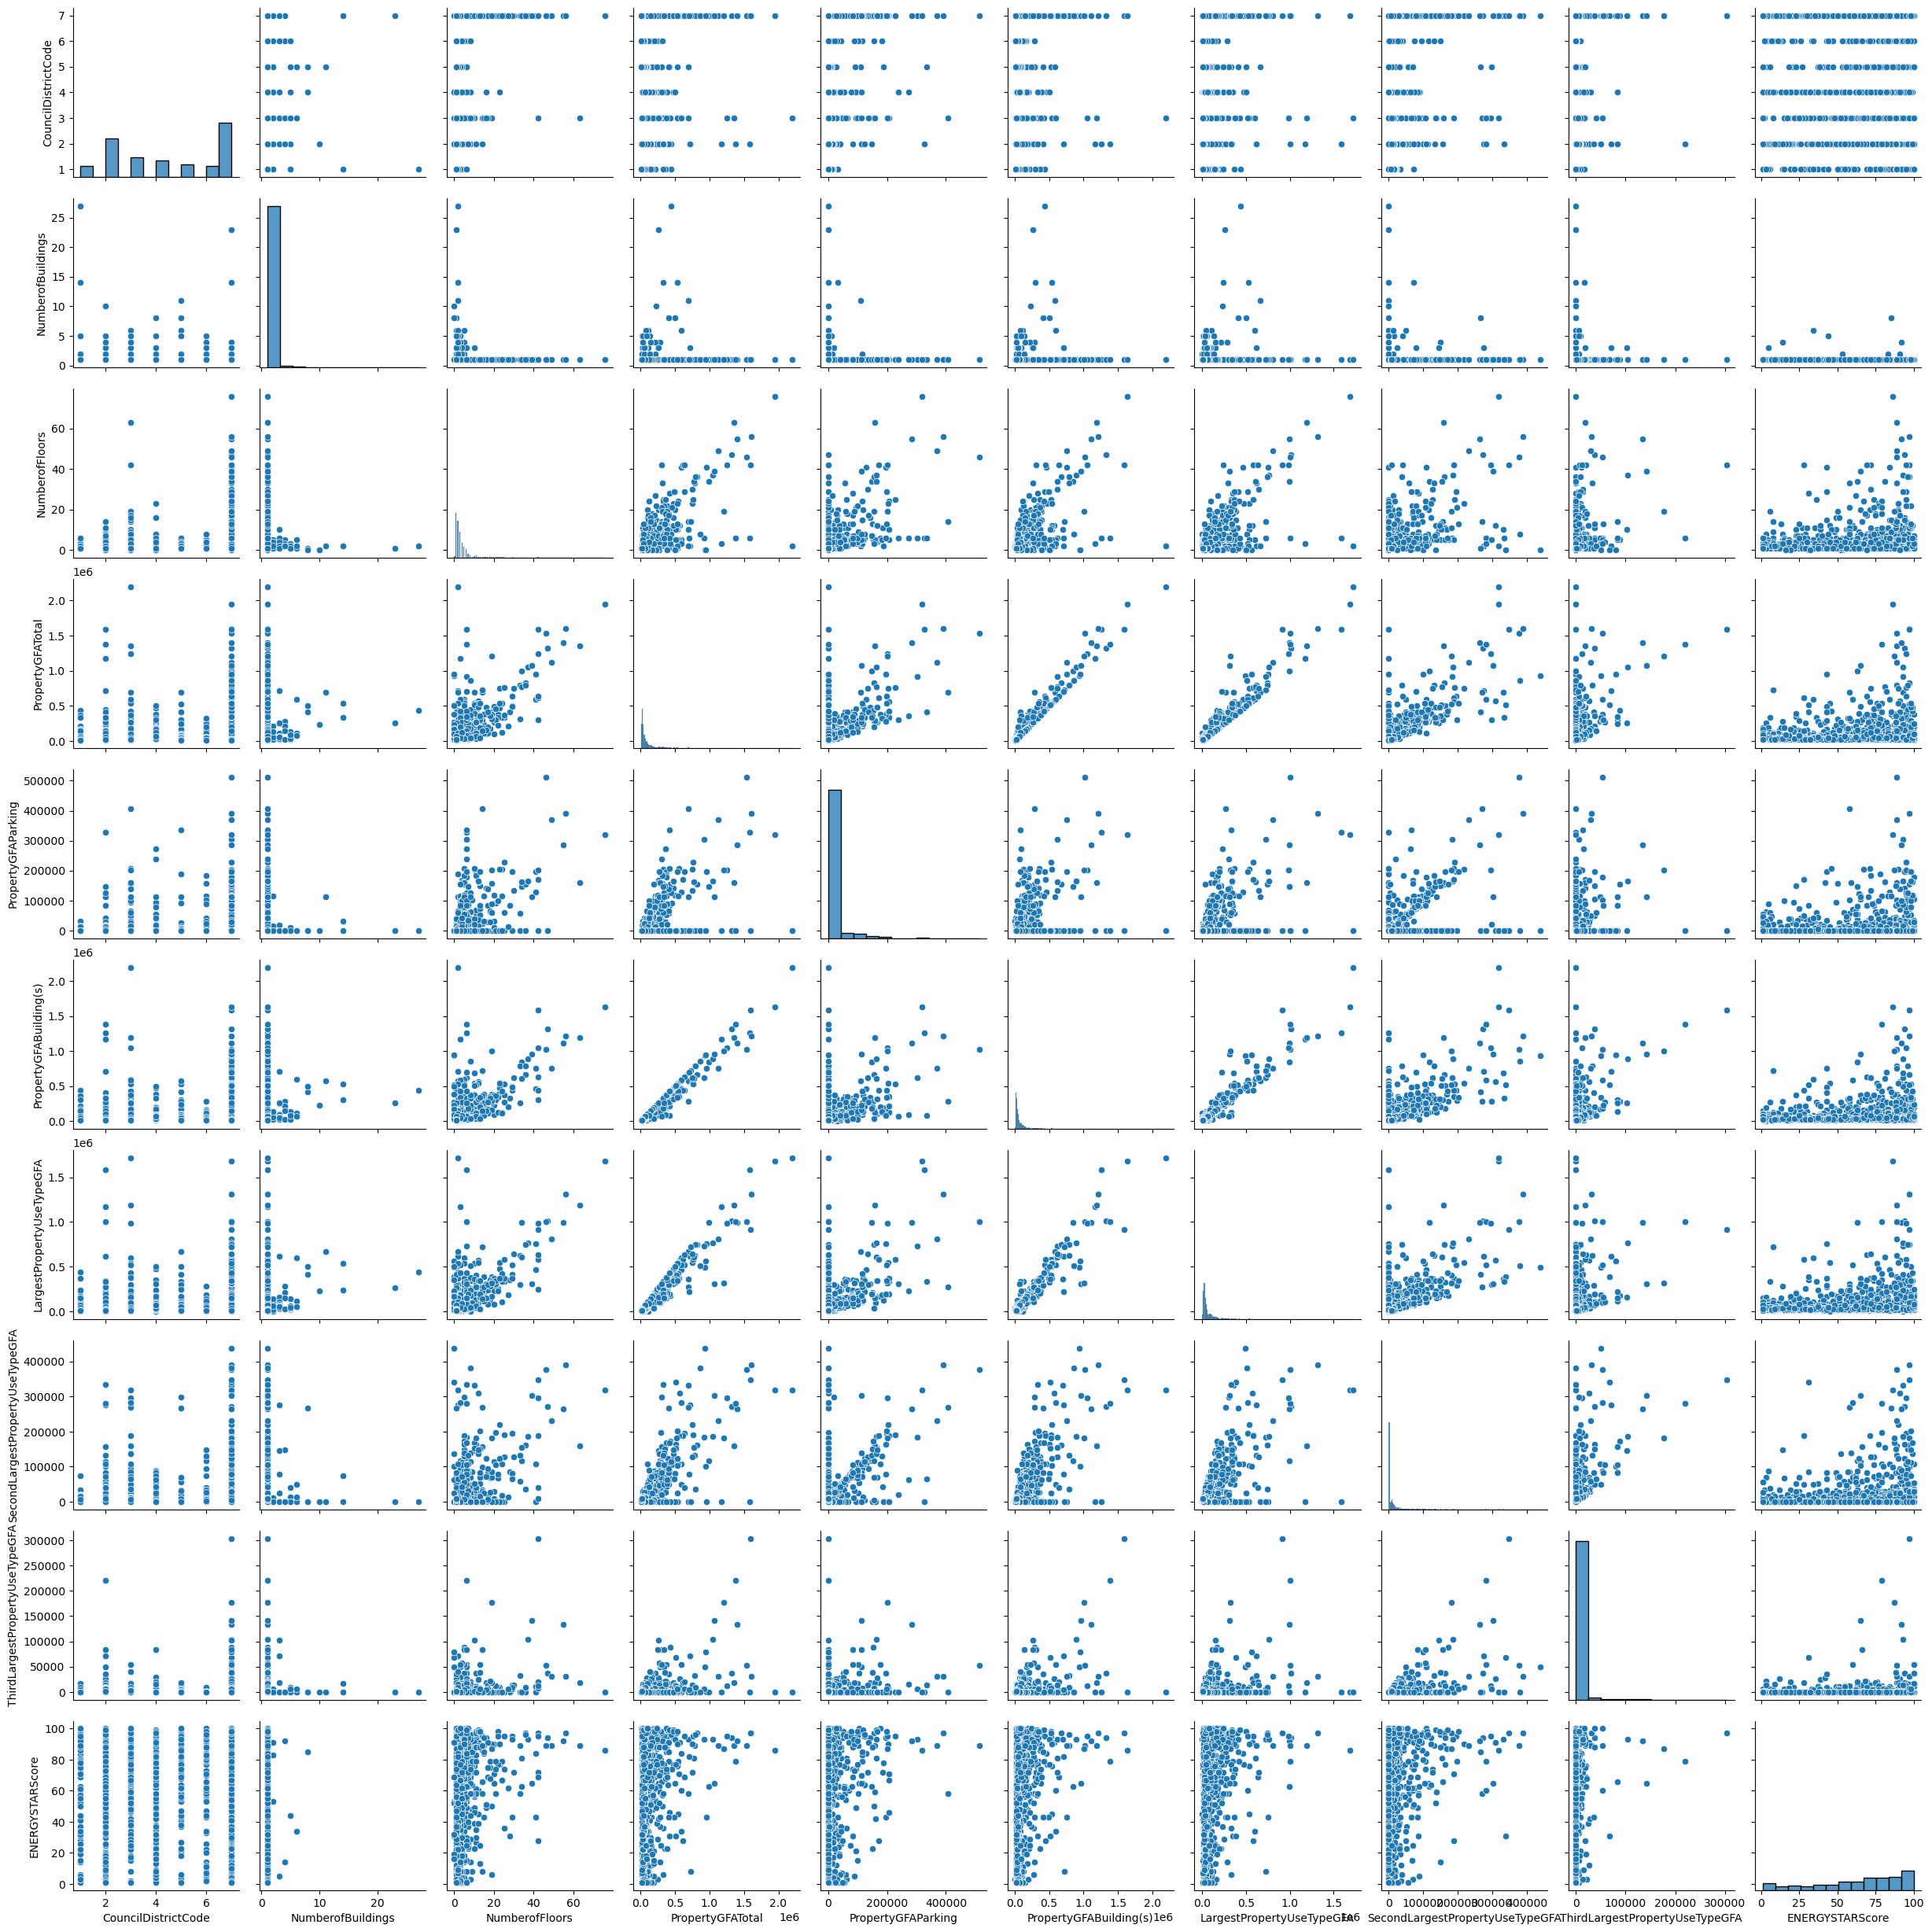

In [98]:
sns.pairplot(df[['CouncilDistrictCode', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore']])

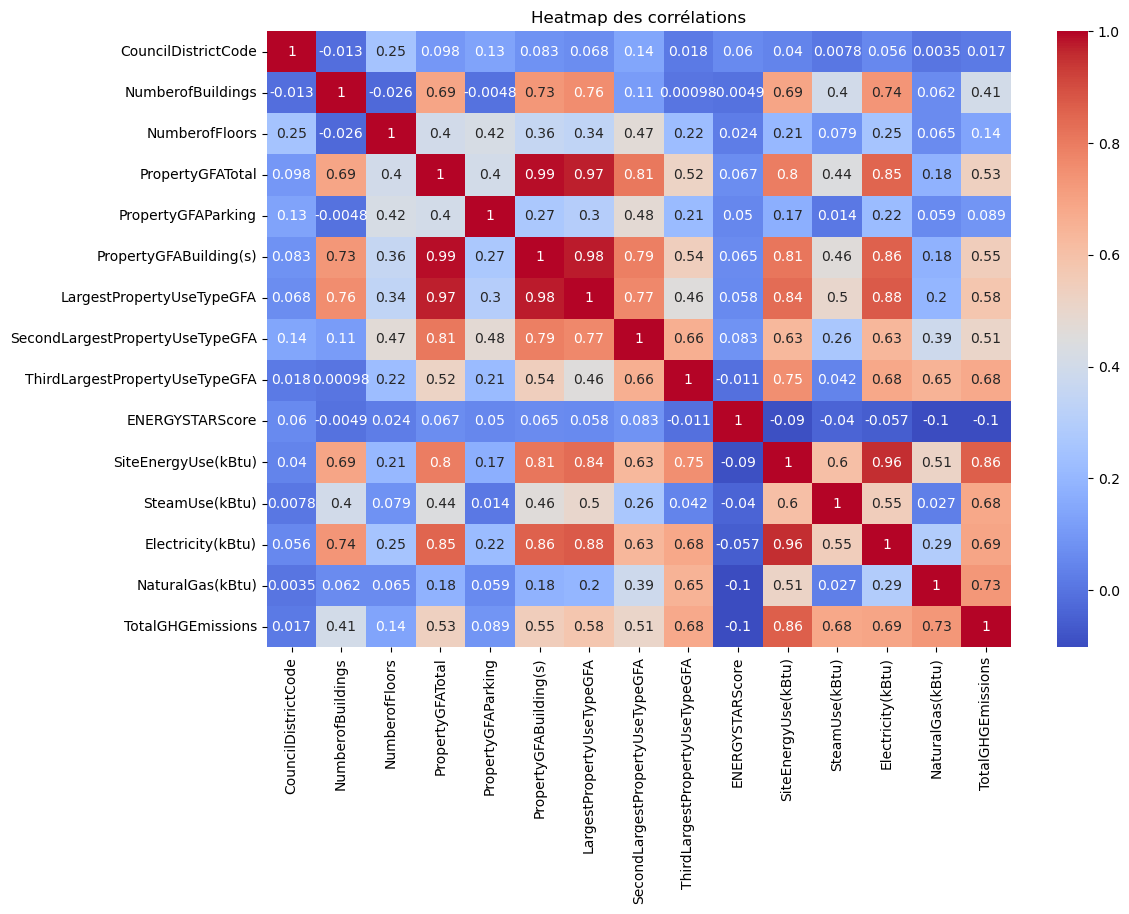

In [99]:
plt.figure(figsize = (12,8))
sns.heatmap(data[var_num].corr(method='pearson'),annot= True , cmap='coolwarm')
plt.title('Heatmap des corrélations')
plt.show()

In [100]:
# X est qualitative
# Y est quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT


In [101]:
df.select_dtypes(['object']).columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'],
      dtype='object')

In [102]:
df_simp = df.dropna(subset=['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType'])
 
for cat in df.select_dtypes(['object']).columns :
    p_value = (eta_squared(df_simp[cat],df_simp['SiteEnergyUse(kBtu)']))
    print(f'Eta squared entre SiteEnergyUse(kBtu) et {cat} : ',p_value)

Eta squared entre SiteEnergyUse(kBtu) et BuildingType :  0.007713458381602303
Eta squared entre SiteEnergyUse(kBtu) et PrimaryPropertyType :  0.24870284173502968
Eta squared entre SiteEnergyUse(kBtu) et Neighborhood :  0.09200253196172968
Eta squared entre SiteEnergyUse(kBtu) et YearBuilt :  0.11696501470903126
Eta squared entre SiteEnergyUse(kBtu) et ListOfAllPropertyUseTypes :  0.7484402391255597
Eta squared entre SiteEnergyUse(kBtu) et LargestPropertyUseType :  0.17297351425020138
Eta squared entre SiteEnergyUse(kBtu) et SecondLargestPropertyUseType :  0.22868309674112658
Eta squared entre SiteEnergyUse(kBtu) et ThirdLargestPropertyUseType :  0.24909305236369544


In [103]:
for cat in df.select_dtypes(['object']).columns :
    p_value = round(eta_squared(df_simp[cat],df_simp['TotalGHGEmissions']),3)
    print(f'Eta squared entre TotalGHGEmissions et {cat} : ',p_value)

Eta squared entre TotalGHGEmissions et BuildingType :  0.004
Eta squared entre TotalGHGEmissions et PrimaryPropertyType :  0.262
Eta squared entre TotalGHGEmissions et Neighborhood :  0.054
Eta squared entre TotalGHGEmissions et YearBuilt :  0.062
Eta squared entre TotalGHGEmissions et ListOfAllPropertyUseTypes :  0.765
Eta squared entre TotalGHGEmissions et LargestPropertyUseType :  0.218
Eta squared entre TotalGHGEmissions et SecondLargestPropertyUseType :  0.137
Eta squared entre TotalGHGEmissions et ThirdLargestPropertyUseType :  0.402


## Sauvegarde du fichier

In [104]:
df.to_csv('data_filtre.csv', sep = '\t',index=False)